In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import operator

In [2]:
df = pd.read_csv('clean.csv')
df.head()

,userID,Title,hours
0,151603712,The Elder Scrolls V Skyrim,273.0
1,151603712,Fallout 4,87.0
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9


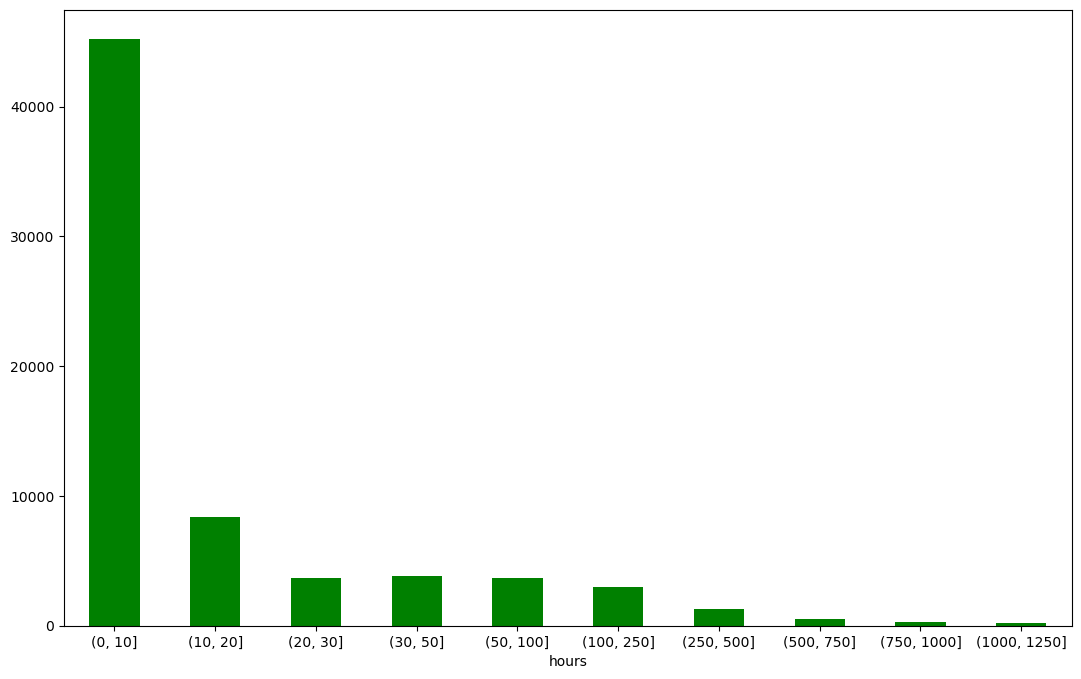

In [3]:
out = pd.cut(df['hours'], bins = [0, 10, 20, 30, 50, 100, 250, 500, 750, 1000, 1250])
ax = out.value_counts(sort=False).plot.bar(rot=0, color="green", figsize = (13, 8))

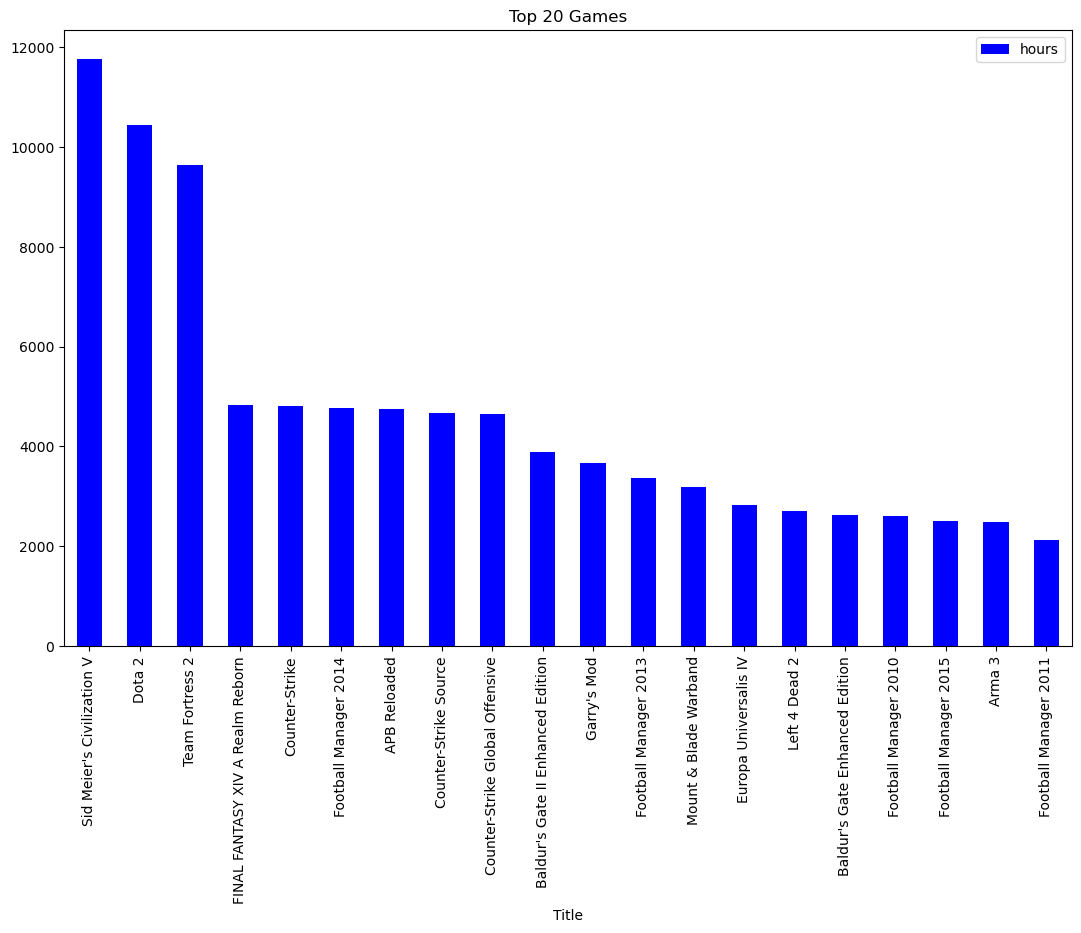

In [4]:
top_hours = df.groupby('Title')['hours'].max().reset_index()
top_hours = top_hours.sort_values(by=['hours'], ascending = False)
top_games = top_hours.head(20)

top_games_graph = top_games[['Title', 'hours']].plot.bar(x = 'Title', y = 'hours', figsize = (13, 8), title = "Top 20 Games", color = "blue")

In [5]:
top_games

,Title,hours
2691,Sid Meier's Civilization V,11754.0
922,Dota 2,10442.0
2994,Team Fortress 2,9640.0
1129,FINAL FANTASY XIV A Realm Reborn,4835.0
670,Counter-Strike,4814.0
1235,Football Manager 2014,4775.0
53,APB Reloaded,4749.0
675,Counter-Strike Source,4676.0
673,Counter-Strike Global Offensive,4659.0
285,Baldur's Gate II Enhanced Edition,3898.0


In [6]:
def frequency(hours_i, user_hours):
    if user_hours == 0:
        return 0
    elif hours_i == user_hours:
        return 1
    return hours_i/(user_hours - hours_i)

In [7]:
def rating(frequency_sum):
    return 4*(1-frequency_sum)+1

In [9]:
game_hours = df.groupby(['Title'])['hours'].sum().reset_index()

df2 = df
steam_length = int(len(df2.index))
i = 0
df2['Frequency'] = np.nan
for i in range(0, steam_length):
    hours_i = df2.iloc[i][2]
    user_hours = game_hours[game_hours['Title'] == df2.iloc[i][1]].iloc[0][1]
    print(hours_i)
    print(user_hours)
    df2.at[i, 'Frequency'] = frequency(hours_i, user_hours)

273.0
70889.3
87.0
10762.8
14.9
1706.6
12.1
14832.9
8.9
33596.7
8.5
416.4
8.1
10185.6
7.5
64.60000000000001
3.3
8659.9
2.8
173673.3
2.5
3184.3
2.0
434.6
1.4
742.0
1.3
3689.1
1.3
2552.5
0.8
2005.6
0.8
116.89999999999999
0.6
4686.3
0.5
1015.1999999999999
0.5
3219.8
0.5
325.2
0.5
981684.6
0.5
1089.2
0.4
9096.6
0.1
49725.3
0.1
15.8
2.3
981684.6
238.0
1460.3
84.0
475.8
58.0
70889.3
22.0
99821.3
13.8
1130.5
10.2
432.7
7.8
4075.5
7.0
35.6
5.2
1511.9
4.8
1200.9
3.4
8171.1
3.2
610.2
2.8
651.9
2.6
444.6
2.3
322771.6
0.7
566.8
0.6
68.1
0.5
0.5
0.4
305.0
0.3
1646.1
0.1
416.40000000000003
0.1
173673.3
86.0
22956.7
72.0
2317.1
71.0
33596.7
59.0
4751.1
54.0
514.7
50.0
487.5
35.0
4954.1
35.0
5076.0
35.0
292.0
34.0
7827.2
33.0
1646.1
32.0
1251.7
25.0
348.3
24.0
955.1999999999999
23.0
2212.6
23.0
3457.5
23.0
533.4
22.0
423.8
21.0
9117.1
21.0
3587.4
19.6
2324.5
18.5
29.4
18.3
777.1
16.9
2076.6
14.3
1726.6
13.7
286.4
13.4
335.59999999999997
12.5
140.6
12.2
1663.7
11.5
1965.9
11.2
708.8
11.1
2563.0
11.0
20

33.0
22956.7
30.0
14381.6
19.8
24055.7
16.2
66.6
11.3
7364.2
4.2
9429.7
3.9
722.1
2.3
825.5
1.7
1845.8
1.0
173673.3
0.8
5412.5
0.8
655.8
0.7
5.4
0.7
3457.5
0.5
9096.6
0.3
190.4
0.3
37.9
865.0
981684.6
271.0
134261.1
16.7
3299.5
10.7
16096.4
8.6
33596.7
8.4
143.79999999999998
2.4
981684.6
2.0
19.6
1.2
11.1
0.7
83.4
0.3
128.1
0.3
1261.2
0.2
825.5
0.2
281.5
60.0
981684.6
60.0
1269.6
31.0
20892.5
7.0
1114.0
3.0
457.6
1256.0
981684.6
8.8
1514.0
8.8
39.300000000000004
2.6
57.7
1.5
3219.8
1.2
77.5
0.8
27.599999999999998
110.0
7696.1
1.9
981684.6
1.0
97.10000000000001
0.4
6891.9
0.3
3816.2
912.0
1150.7
153.0
5189.8
79.0
20315.4
29.0
2492.0
19.7
2609.8
13.3
12937.4
12.3
7364.2
6.4
6239.7
4.6
3219.8
2.7
33596.7
2.6
1514.0
2.3
2076.6
1.6
199.3
1.4
2108.1
1.0
1390.3
0.9
1320.9
0.9
3299.5
0.3
327.4
0.3
308.1
0.3
1394.4
0.3
4742.8
0.2
486.5
0.2
10185.6
0.3
16096.4
0.3
981684.6
1.9
981684.6
128.0
1901.6
72.0
99821.3
59.0
692.3
58.0
3581.9
46.0
655.4
41.0
59.4
41.0
213.7
35.0
732.6
21.0
22667.9
14.6
3

0.4
981684.6
8.9
9759.0
4.5
1618.1000000000001
2.4
642.1
0.1
1422.1
90.0
322771.6
29.0
22667.9
28.0
7827.2
14.8
341.3
5.2
195.2
4.3
218.3
3.4
424.1
2.0
981684.6
1.1
483.9
0.6
469.40000000000003
0.6
2053.8
0.3
3444.1
76.0
322771.6
374.0
981684.6
191.0
6193.8
53.0
322771.6
48.0
4954.1
46.0
16096.4
46.0
49725.3
17.2
27074.6
16.4
3451.5
12.9
1845.8
7.9
521.2
7.6
3299.5
7.5
14381.6
5.9
4703.1
5.7
5458.1
5.0
1505.0
5.0
173673.3
4.0
1002.8
3.9
9096.6
3.7
974.7
3.3
309.2
2.9
483.9
2.3
761.8
2.0
923.5
1.9
281.5
1.6
9117.1
1.5
1321.2
1.4
3964.4
1.4
2014.1
0.8
521.3
0.6
77.7
0.6
1.4
0.4
93.3
0.4
80.6
0.4
135.2
0.4
9.6
0.4
1015.1999999999999
0.4
172.5
0.3
73.6
0.3
3234.3
0.2
3.0
0.2
217.3
0.2
970.0
0.2
22.7
0.2
4.3
0.2
199.3
0.2
27.599999999999998
0.2
47.2
0.1
1320.9
0.1
84.39999999999999
331.0
981684.6
622.0
322771.6
59.0
981684.6
4.0
6678.6
4.0
8171.1
2.9
96075.5
2.2
77.8
1.8
35.8
2.4
21030.3
1.8
341.3
0.6
61.5
0.6
16096.4
0.8
173673.3
1.7
981684.6
1.4
981684.6
68.0
173673.3
23.0
521.3
16.5
3227

0.9
148.1
879.0
981684.6
1.5
981684.6
446.0
99821.3
128.0
9966.0
125.0
2396.6
63.0
3284.0
57.0
288.1
53.0
180.8
42.0
1648.8000000000002
37.0
21030.3
17.1
1845.8
16.8
39.0
14.7
841.2
7.2
26.4
4.3
113.30000000000001
0.3
1259.6
24.0
635.4
7.5
173673.3
0.9
50.4
0.8
682.0
110.0
70889.3
79.0
173673.3
142.0
70889.3
99.0
22667.9
30.0
5076.0
28.0
1511.9
22.0
692.3
15.5
841.0
14.8
295.8
13.9
29951.8
13.3
2598.1
11.2
185.3
10.6
4139.5
10.1
140.8
9.9
3184.3
9.7
1002.8
8.4
33.2
7.7
1254.3
7.5
1504.7
6.9
131.4
6.3
7950.0
6.0
688.4
5.9
435.9
5.8
7827.2
5.5
322771.6
5.0
238.5
4.9
1663.7
4.8
1965.9
4.2
486.5
4.0
125.5
3.8
195.7
3.5
335.59999999999997
3.3
173673.3
3.3
33596.7
3.1
14832.9
3.0
28.6
2.9
398.4
2.9
1130.5
2.8
221.7
2.8
3444.1
2.8
6891.9
2.7
7696.1
2.5
168.1
2.3
3816.2
2.2
15761.5
2.0
218.3
1.9
6.0
1.9
912.0
1.9
54.9
1.8
192.1
1.8
30.0
1.7
598.5
1.7
93.4
1.6
19.1
1.5
3.4
1.5
335.0
1.4
16.0
1.4
120.5
1.4
424.1
1.3
612.9
1.3
19.7
1.3
2085.6
1.3
2282.8
1.2
3689.1
1.2
19.7
1.1
1.1
1.0
8.1
1.0
22.

45.0
1015.7
45.0
3587.4
40.0
1002.8
35.0
469.40000000000003
35.0
2076.6
30.0
2609.8
29.0
7696.1
29.0
156.2
28.0
321.4
27.0
2842.2
25.0
424.1
25.0
409.7
23.0
2053.8
23.0
426.1
23.0
2631.0
22.0
866.9
21.0
1200.9
19.9
15761.5
18.3
1089.2
18.3
1394.4
17.9
496.8
16.4
3689.1
16.4
310.5
14.9
211.3
12.6
625.7
12.4
4260.3
11.9
624.9
11.4
566.8
9.3
81.7
9.2
15.899999999999999
8.8
29.1
7.9
3581.9
7.9
171.3
7.9
60.9
7.5
60.7
7.4
401.6
6.9
11.600000000000001
6.7
78.3
6.4
126.70000000000002
5.8
70889.3
5.7
15.2
4.8
1120.2
4.7
9.5
4.1
255.6
3.8
44.1
3.6
305.0
3.1
283.4
3.1
40.7
3.1
303.3
3.1
836.5
3.0
843.8
2.3
468.5
2.2
8.4
2.0
3094.9
1.7
6.2
1.4
155.29999999999998
1.2
3254.3
1.1
612.9
1.1
4983.7
1.1
14.200000000000001
0.8
18.4
0.7
1047.6
0.6
142.7
0.6
2.0
0.6
1579.5
0.4
15.4
0.3
353.5
0.3
375.7
0.3
574.3
0.2
184.4
0.2
13593.1
2.0
981684.6
0.4
981684.6
18.5
382.09999999999997
16.4
295.2
11.9
2282.8
7.0
574.3
3.9
9117.1
2.1
2360.7
0.1
3.5999999999999996
1797.0
981684.6
258.0
173673.3
239.0
981684.6
4

65.0
10762.8
63.0
5189.8
60.0
20636.8
58.0
1493.0
53.0
1245.8
52.0
16096.4
52.0
19613.8
51.0
4876.9
51.0
22667.9
47.0
3230.3
43.0
633.5
37.0
368.6
35.0
1505.0
34.0
841.0
31.0
4954.1
29.0
4751.1
28.0
2212.6
27.0
2563.0
26.0
172.2
25.0
229.5
24.0
9117.1
24.0
314.4
20.0
199.8
19.6
409.7
19.6
271.8
19.0
343.0
17.8
4467.1
17.0
1951.8
15.8
3964.4
15.0
5334.5
13.8
1200.9
13.2
2324.5
12.1
49725.3
12.0
375.7
10.6
8171.1
10.5
322771.6
9.8
15.200000000000001
9.4
2031.9
9.3
2053.8
8.8
8.8
8.4
120.5
7.4
1416.3
7.0
624.6
6.8
304.0
6.4
4075.5
6.0
1433.6
5.7
1594.9
5.1
789.2
5.0
280.0
4.8
1321.2
4.6
2532.0
4.3
1788.1
4.1
3581.9
3.7
188.4
3.7
3.7
3.2
1514.0
3.1
587.7
2.9
7226.9
2.9
20315.4
2.7
2.7
2.6
684.6
2.5
1251.6000000000001
2.4
7364.2
2.4
3.0999999999999996
2.2
1695.2
2.1
99.3
2.1
20892.5
2.0
970.0
2.0
786.5
1.7
243.2
1.7
9.6
1.6
3457.5
1.4
105.5
1.4
1430.4
1.4
62.9
1.3
4818.4
1.0
5412.5
0.8
521.2
0.6
3254.3
0.5
142.1
0.5
33.2
0.4
37.0
0.4
9.0
0.4
75.4
0.3
1130.5
0.3
3.3
0.3
26.5
0.2
12.399999999

1.2
1352.3
68.0
981684.6
103.0
160.2
5.9
2108.1
1.7
9237.2
0.1
981684.6
16.2
70889.3
33.0
16096.4
12.7
173673.3
3.3
682.0
0.3
118.5
0.2
308.1
1266.0
20315.4
128.0
173673.3
22.0
3587.4
11.3
2031.9
0.6
309.2
437.0
134261.1
0.9
7950.0
16.4
981684.6
1.1
173673.3
14.8
173673.3
3.1
9966.0
1.7
2139.2
21.0
4954.1
4.0
2014.1
8.5
981684.6
8.4
1788.1
2.1
21.0
9.3
322771.6
7.6
173673.3
4.8
336.4
4.7
2108.1
2.0
19613.8
1.2
981684.6
1.0
1845.8
0.8
33596.7
0.5
14381.6
22.0
70889.3
1697.0
134261.1
6.5
981684.6
1.6
981684.6
2.1
981684.6
4.4
2893.4
106.0
70889.3
45.0
1232.2
43.0
3587.4
42.0
4686.3
41.0
3257.5
29.0
10762.8
23.0
1130.5
22.0
227.9
18.3
297.0
17.4
2282.8
16.1
3689.1
14.2
29951.8
13.3
124.5
10.9
1646.1
9.7
1120.2
8.9
244.6
8.3
843.8
6.8
1089.2
6.0
115.5
5.5
30.7
5.0
4738.5
4.9
308.0
4.6
188.3
3.1
2396.6
3.0
15761.5
2.6
8171.1
1.5
327.4
1.4
751.7
1.1
1565.7
0.6
1945.9
0.5
3.2
0.3
10.5
0.2
216.6
18.3
981684.6
432.0
173673.3
11.3
134261.1
430.0
7827.2
165.0
322771.6
62.0
1261.2
49.0
65.89999999

8.9
981684.6
8.1
981684.6
395.0
322771.6
0.3
981684.6
0.3
49725.3
2.6
981684.6
289.0
96075.5
127.0
127.0
22.0
49725.3
11.0
1321.2
7.4
1015.8
4.6
173673.3
0.8
168.1
0.2
34.3
153.0
3457.5
79.0
22667.9
73.0
3230.3
62.0
99821.3
37.0
976.4
36.0
4954.1
36.0
9117.1
32.0
1261.2
31.0
1646.1
26.0
5076.0
21.0
70889.3
19.5
655.8
12.9
192.1
8.1
322771.6
7.4
401.6
7.1
1089.2
6.3
229.5
6.0
1460.3
5.4
5334.5
5.1
424.1
4.2
1688.9
3.6
2282.8
3.5
2315.8
3.5
65.5
3.3
1145.1
3.1
923.1
2.0
18.4
1.7
380.1
1.7
651.9
1.7
134.2
1.6
282.3
1.6
4686.3
1.6
240.8
1.4
14832.9
1.3
73.6
1.3
26.1
1.2
415.4
1.2
598.5
1.2
143.2
1.0
110.8
1.0
50.199999999999996
0.9
612.9
0.8
173673.3
0.8
410.4
0.8
300.3
0.8
46.3
0.8
67.6
0.7
453.3
0.7
29951.8
0.6
346.6
0.6
518.2
0.6
33.2
0.5
2563.0
0.4
147.0
0.4
55.5
0.4
49725.3
0.4
12.4
0.4
27.4
0.3
38.0
0.3
5458.1
0.3
7.4
0.3
38.0
0.2
193.3
0.2
10.7
0.2
574.3
0.2
238.8
0.2
36.3
0.2
107.0
0.1
156.1
0.1
362.7
0.1
19.6
0.1
31.0
0.1
61.6
0.1
692.9
0.1
2085.6
0.1
1945.9
0.1
105.5
251.0
981684

3.9
173673.3
34.0
981684.6
5.0
981684.6
1069.0
981684.6
635.0
322771.6
60.0
19613.8
58.0
248.5
43.0
49725.3
41.0
15275.3
32.0
8171.1
28.0
4876.9
24.0
96075.5
21.0
2532.0
14.2
16096.4
10.7
3254.3
8.4
33596.7
6.2
27.5
5.5
682.0
5.3
6678.6
5.1
5.1
4.1
8.4
3.9
3964.4
3.5
625.7
3.4
735.8
3.0
29951.8
2.5
1663.7
2.4
173673.3
2.2
27.2
1.9
655.8
1.4
70.3
1.3
533.4
1.3
2014.1
1.2
39.4
0.9
1051.2
0.7
44.6
0.7
28.5
0.7
326.1
0.6
496.8
0.6
35.8
0.6
281.5
0.4
308.2
0.3
3457.5
0.2
1181.6
0.2
353.5
0.2
3.4
0.1
114.7
0.1
160.2
1.9
134261.1
23.0
1399.8
1.5
2282.8
253.0
981684.6
775.0
322771.6
384.0
22667.9
287.0
13816.3
91.0
4751.1
87.0
173673.3
48.0
2852.1
44.0
3457.5
38.0
2563.0
34.0
70889.3
34.0
1261.2
31.0
976.4
26.0
1646.1
26.0
49725.3
26.0
422.8
22.0
3184.3
20.0
5076.0
19.0
42009.9
17.8
2076.6
17.0
2324.5
16.3
9117.1
14.9
1320.9
13.7
7827.2
11.9
3689.1
11.5
1951.8
11.0
1390.3
10.7
599.5
9.6
979.0
9.6
1388.9
8.8
24055.7
8.0
19613.8
7.3
3234.3
6.2
6.2
5.6
635.4
5.5
1089.2
5.0
533.4
4.7
655.8
4.6
396

13.0
841.0
10.8
2212.6
3.3
96075.5
1.7
197.7
1.4
343.0
1.2
89.0
0.8
192.1
0.4
19613.8
0.2
7950.0
0.1
134261.1
61.0
99.0
2.0
64.60000000000001
0.6
1251.6000000000001
23.0
9966.0
17.6
1955.0
15.4
1726.6
10.0
8635.4
5.7
457.6
4.3
42009.9
10.8
21030.3
5.3
981684.6
0.3
981684.6
12.8
2532.0
6.9
14832.9
6.8
70889.3
1.6
981684.6
0.5
173673.3
395.0
17144.5
56.0
173673.3
42.0
9117.1
32.0
1223.8
28.0
353.5
14.1
20603.0
12.3
612.9
10.0
215.1
6.2
3876.0
5.6
496.8
0.6
5443.6
0.3
4674.7
0.3
42009.9
0.3
9096.6
0.2
8635.4
28.0
981684.6
1.8
981684.6
2249.0
32308.6
1709.0
30845.8
1317.0
30574.8
1035.0
24283.1
100.0
2296.6
60.0
9020.7
0.3
2014.1
1.9
981684.6
0.3
981684.6
22.0
114.2
10.0
4674.7
5.2
27074.6
2.5
979.0
1.1
3444.1
0.5
10185.6
0.4
981684.6
491.0
30574.8
6.8
177.7
1.8
121.69999999999999
1.0
147.0
1.6
981684.6
1838.0
981684.6
4.1
521.3
1.2
173673.3
0.5
1015.1999999999999
93.0
70889.3
8.1
173673.3
7.2
2271.8
2.7
6239.7
1.2
1399.8
29.0
981684.6
614.0
322771.6
210.0
981684.6
77.0
134261.1
1.0
1261.2

0.2
96075.5
55.0
96075.5
1.2
974.7
8.1
16096.4
5.5
682.0
0.5
742.0
571.0
20603.0
500.0
13593.1
221.0
27074.6
122.0
7364.2
54.0
7827.2
40.0
5443.6
22.0
33596.7
8.2
1223.8
0.9
93.3
19.5
96075.5
8.2
173673.3
1.1
2440.7
0.2
1351.5
13.0
173673.3
5.8
1399.8
3.3
16096.4
0.5
1321.2
2.4
981684.6
272.0
134261.1
80.0
7950.0
2.1
418.2
0.2
817.0
61.0
981684.6
1.3
1955.0
777.0
981684.6
0.9
27074.6
3.3
625.7
0.6
981684.6
1.0
27074.6
13.2
981684.6
415.0
134261.1
257.0
70889.3
209.0
6678.6
182.0
322771.6
163.0
173673.3
151.0
20603.0
114.0
49725.3
87.0
9237.2
75.0
15275.3
56.0
3964.4
30.0
1941.4
21.0
33596.7
19.5
7950.0
14.7
1245.8
14.0
4686.3
12.2
3689.1
11.4
8171.1
8.9
9117.1
5.0
78.8
3.7
3816.2
2.9
16096.4
2.5
5443.6
2.4
981684.6
2.3
303.3
2.2
4674.7
1.2
128.1
1.1
7696.1
0.7
134.2
0.6
172.5
245.0
173673.3
2.0
981684.6
24.0
7364.2
17.9
96075.5
11.8
22.6
6.4
16096.4
6.3
1433.6
5.2
4260.3
2.1
981684.6
0.8
4910.8
0.4
184.4
0.3
483.9
0.1
143.79999999999998
1.8
122.9
0.8
981684.6
0.1
17144.5
7.7
134261.1
1

67.0
3712.9
30.0
4954.1
29.0
521.2
25.0
33596.7
10.6
1388.9
8.5
4674.7
1.6
105.5
0.9
199.4
0.6
2282.8
0.4
7.3
0.3
6067.7
0.3
4.3
0.3
184.4
0.2
1505.0
415.0
6735.5
100.0
15275.3
55.0
5458.1
37.0
10185.6
36.0
866.9
25.0
70889.3
23.0
3581.9
17.1
1715.7
15.0
553.9
13.4
1663.7
13.1
9117.1
10.6
188.3
10.2
4260.3
9.7
541.0
9.4
444.6
8.8
49725.3
8.4
11.700000000000001
8.3
625.7
7.9
435.9
7.8
49.3
7.3
238.8
7.0
10.4
6.8
1706.6
6.7
378.8
6.1
923.1
5.9
238.5
5.4
60.5
4.9
15.8
4.7
92.2
4.6
37.8
4.5
148.2
4.4
12.100000000000001
4.3
424.1
4.2
2282.8
4.2
142.6
3.9
15.8
3.9
100.4
3.6
67.6
3.6
244.6
3.6
60.7
3.5
372.9
3.4
303.3
3.1
211.3
3.0
86.7
3.0
14.200000000000001
2.7
574.3
2.2
147.0
2.1
2.4
2.1
72.0
2.1
2.5
2.1
2031.9
2.0
96075.5
1.9
57.1
1.7
3.4
1.6
3.9000000000000004
1.5
16096.4
1.3
51.7
1.3
125.0
1.2
11.6
1.2
64.2
1.1
3.6
1.1
453.3
1.0
29951.8
1.0
23.5
0.9
23.1
0.8
64.6
0.8
26.5
0.8
44.6
0.7
735.8
0.7
14.100000000000001
0.7
218.3
0.7
1089.2
0.6
61.6
0.5
0.5
0.5
0.5
0.5
23.1
0.4
42.5
0.4
981684

3.8
33596.7
1.1
283.4
1.0
332.2
1.0
9.3
0.5
16096.4
0.5
2317.1
0.4
309.2
0.3
84.39999999999999
0.2
47.1
0.2
35.8
406.0
42009.9
218.0
17144.5
148.0
7226.9
94.0
22956.7
83.0
322771.6
79.0
173673.3
62.0
6891.9
49.0
4738.5
42.0
3201.2
42.0
13816.3
35.0
10762.8
34.0
3096.4
34.0
15275.3
32.0
70889.3
29.0
22667.9
25.0
29951.8
22.0
3816.2
21.0
20315.4
21.0
9117.1
18.9
3581.9
17.8
314.4
17.7
339.1
15.2
132.4
13.9
6193.8
13.8
8635.4
13.4
228.6
13.2
3876.0
13.0
2315.8
12.1
786.5
12.0
2324.5
11.1
49725.3
11.1
1523.2
9.6
2598.1
8.9
5334.5
8.9
781.3000000000001
8.3
486.5
8.1
3964.4
8.1
642.1
7.8
1415.9
7.6
836.5
7.3
993.3
6.2
2626.5
6.2
190.4
6.2
624.9
5.8
7827.2
5.4
2053.8
5.0
1691.3
4.5
981684.6
3.9
1200.9
3.7
324.6
3.1
219.2
2.0
2498.9
1.6
1320.9
1.3
189.7
1.2
625.7
1.2
475.8
1.1
9429.7
0.7
303.3
0.7
247.9
0.4
198.8
0.3
923.1
0.3
1388.9
0.7
981684.6
0.2
217.3
3.4
981684.6
0.8
981684.6
19.3
981684.6
0.5
1320.9
0.5
3299.5
38.0
32308.6
1157.0
2552.5
102.0
9117.1
68.0
33596.7
57.0
981684.6
35.0
8659.

6.9
15761.5
6.8
335.59999999999997
6.8
84.89999999999999
6.7
566.8
6.6
1706.6
6.4
789.2
6.3
486.5
6.3
18.2
6.0
405.3
6.0
6.0
6.0
82.4
6.0
126.70000000000002
5.9
300.3
5.6
109.8
5.5
409.7
5.4
14.8
5.4
20.5
5.2
5.2
5.1
4742.8
5.1
51.8
5.0
28.2
4.9
65.2
4.9
188.3
4.9
156.2
4.8
48.2
4.7
211.3
4.7
9020.7
4.7
2396.6
4.6
96.3
4.6
866.9
4.6
41.7
4.6
651.9
4.5
2532.0
4.5
35.3
4.5
1579.5
4.5
111.69999999999999
4.4
45.4
4.4
513.2
4.3
240.8
4.3
405.9
4.3
1200.9
4.2
34.9
4.2
1216.6
4.2
10.0
4.1
166.7
4.1
34.7
4.1
303.3
4.1
781.3000000000001
3.9
8.0
3.9
4139.5
3.8
79.6
3.7
828.5
3.7
3581.9
3.7
3457.5
3.7
836.5
3.6
746.7
3.6
38.0
3.5
1715.7
3.4
888.9
3.3
4.5
3.2
75.7
3.2
221.7
3.2
288.2
3.2
184.8
3.0
139.4
3.0
31.0
3.0
195.2
2.9
22.4
2.9
1523.2
2.9
786.5
2.9
95.6
2.8
69.4
2.8
76.9
2.8
2.8
2.7
286.4
2.6
85.7
2.6
171.4
2.4
8659.9
2.4
176.6
2.4
1181.6
2.3
142.6
2.3
3284.0
2.3
4983.7
2.2
981684.6
2.2
28.4
2.2
1324.3
2.1
80.5
2.1
2.4
2.1
6067.7
2.0
195.5
2.0
97.10000000000001
2.0
5458.1
2.0
15.89999999999

22.0
187.2
21.0
118.8
16.5
375.7
15.4
61.5
14.5
136.79999999999998
14.3
167.3
13.1
3201.2
12.1
21030.3
10.9
1288.1
10.2
3501.1
9.4
106.4
8.5
665.6
8.0
15761.5
7.8
83.9
7.4
1430.4
7.4
22.6
6.8
180.0
6.0
6.0
5.9
8.9
5.8
1618.1000000000001
4.7
109.8
4.5
23.1
4.4
110.7
4.1
1182.4
3.8
75.9
3.7
3.8000000000000003
3.6
37.3
3.1
3.1
3.0
6.800000000000001
2.8
457.6
2.6
97.10000000000001
2.3
17.0
1.8
125.5
1.3
370.9
1.2
25.1
1.0
42.9
1.0
1.0
0.9
1269.6
0.9
1.9
0.9
1422.1
0.7
6.8
0.7
70889.3
0.7
79.2
0.7
69.2
0.6
1.7999999999999998
0.5
9966.0
0.5
87.3
0.5
197.7
0.4
179.4
0.4
96.3
0.4
789.2
0.3
8.0
0.3
2455.7
0.3
174.7
0.2
412.8
0.2
180.0
619.0
4075.5
166.0
1695.2
86.0
127.3
62.0
676.0
50.0
13593.1
40.0
2631.0
26.0
1498.6
15.1
2563.0
8.3
612.6
8.2
339.1
7.9
58.4
7.6
3184.3
4.7
4.7
2.5
22956.7
1.2
127.1
0.8
74.5
0.6
50.7
0.4
475.7
0.2
116.2
0.2
4.9
0.1
60.5
17.1
981684.6
0.6
3219.8
29.0
430.9
26.0
161.7
16.3
2552.5
8.6
2053.8
5.7
2282.8
4.7
99821.3
3.3
2631.0
2.7
2.9000000000000004
2.4
63.2
2.4
80.5

13.9
105.3
12.6
2893.4
12.3
336.4
12.1
1688.9
12.1
4738.5
11.8
65.2
11.4
62.8
11.0
3254.3
10.7
111.1
10.5
2380.1
10.4
513.2
10.3
612.6
10.2
689.6
10.2
691.9
9.8
30.0
9.8
1207.8
9.4
22.2
9.3
431.4
9.1
84.4
8.6
22956.7
8.1
401.6
7.9
2842.2
7.6
218.3
7.4
259.09999999999997
7.4
127.1
7.2
154.2
7.2
9117.1
6.7
481.7
6.6
121.69999999999999
6.2
54.3
6.0
1579.5
5.9
3113.6
5.7
52.8
5.6
43.4
5.3
1223.8
5.2
154.7
5.1
322771.6
5.1
2975.5
4.9
890.8000000000001
4.8
1845.8
4.6
2532.0
4.4
1125.5
4.4
2282.8
4.1
8.2
3.5
415.4
3.5
55.5
3.4
4260.3
3.4
381.9
3.2
104.6
3.1
1045.0
2.9
78.7
2.8
310.5
2.7
124.0
2.5
21.400000000000002
2.4
362.7
2.2
1422.1
2.1
119.3
2.1
1788.1
2.1
3457.5
2.0
58.4
2.0
77.5
2.0
58.5
1.9
5.9
1.9
5076.0
1.9
221.7
1.8
92.2
1.8
123.3
1.8
136.4
1.7
39.7
1.6
888.9
1.5
147.0
1.5
120.2
1.4
149.4
1.3
76.9
1.3
1941.4
1.2
126.70000000000002
1.1
426.1
1.1
84.89999999999999
1.1
1523.2
0.9
47.9
0.9
1251.6000000000001
0.9
85.8
0.8
3257.5
0.8
27074.6
0.8
1715.7
0.8
26.8
0.8
7226.9
0.8
13.100000000

0.7
14832.9
57.0
2631.0
11.0
33596.7
10.7
574.3
10.4
5076.0
7.4
1002.8
4.9
110.2
1.2
29951.8
0.9
923.1
9.3
981684.6
598.0
32308.6
323.0
24283.1
303.0
30574.8
90.0
2296.6
11.5
353.5
4.0
866.1
2.7
73.8
1.5
173673.3
0.1
6.5
740.0
42009.9
248.0
17144.5
133.0
6678.6
49.0
96075.5
17.6
237.5
6.5
173673.3
5.0
322771.6
4.0
8635.4
3.4
49725.3
2.7
3876.0
1.8
3712.9
5.1
134261.1
0.6
981684.6
679.0
30845.8
1.7
24283.1
0.3
3219.8
10.3
21030.3
0.7
1399.8
0.1
309.2
115.0
30845.8
1.6
635.4
0.1
31.1
204.0
49725.3
13.9
5334.5
13.4
24055.7
10.0
7226.9
6.1
96075.5
4.4
372.9
3.3
173673.3
3.0
5189.8
1.4
16096.4
1.1
119.3
0.7
923.1
0.4
3964.4
541.0
981684.6
10.1
203.4
0.6
981684.6
800.0
981684.6
1.3
14381.6
269.0
17144.5
90.0
3876.0
1.8
496.8
0.2
2014.1
0.9
173673.3
30.0
981684.6
9.8
3201.2
460.0
22956.7
361.0
10762.8
165.0
4751.1
27.0
57.3
14.9
742.0
0.9
322771.6
4217.0
134261.1
785.0
322771.6
33.0
33596.7
2.3
4260.3
0.9
625.7
0.4
2014.1
0.2
7950.0
84.0
5334.5
44.0
173673.3
2.3
4840.3
0.2
9117.1
150.0
981684

18.5
16096.4
4.4
1320.9
0.9
682.0
0.4
4818.4
4.6
981684.6
8.1
981684.6
0.7
353.5
0.5
3.8
14.8
134261.1
7.0
39.4
44.0
1242.0
22.0
15761.5
12.9
783.0
0.2
981684.6
12.4
253.8
1.7
16096.4
1.1
9096.6
0.5
1.8
0.4
180.0
0.2
9237.2
0.1
56.7
0.1
0.4
1.2
43.1
0.8
1.1
0.5
497.0
0.3
1730.8999999999999
1.1
981684.6
1.4
574.3
760.0
9020.7
473.0
4201.4
141.0
14832.9
136.0
70889.3
106.0
33596.7
102.0
10762.8
58.0
1251.7
48.0
4954.1
47.0
99821.3
46.0
185.9
44.0
302.4
40.0
1047.6
39.0
435.9
32.0
5076.0
31.0
372.9
25.0
751.7
22.0
1945.9
21.0
1695.2
16.4
68.3
15.7
2053.8
14.9
173673.3
12.6
665.5
12.1
25.1
11.4
888.9
10.6
407.1
10.4
382.09999999999997
8.5
270.5
8.4
1514.0
7.9
20636.8
7.7
434.3
7.3
1089.2
6.7
9117.1
6.6
9.0
6.6
6239.7
6.4
497.8
6.4
166.4
6.1
768.2
5.3
970.0
5.2
237.1
5.1
3816.2
3.9
36.8
3.5
312.5
3.1
94.7
3.0
2282.8
2.7
283.4
2.2
2031.9
2.2
336.4
2.0
123.60000000000001
1.8
128.9
1.6
49725.3
1.6
682.4
1.5
16096.4
1.1
3299.5
0.9
164.1
0.9
155.29999999999998
0.8
171.4
0.8
56.2
0.7
100.3
0.4
6.

8.2
140.6
7.0
1228.2
0.2
416.40000000000003
36.0
7364.2
1.1
322771.6
1.0
19613.8
2046.0
981684.6
197.0
49725.3
72.0
96075.5
58.0
322771.6
28.0
16096.4
0.2
5.4
0.1
6.9
5.5
322771.6
0.3
974.7
765.0
322771.6
217.0
173673.3
192.0
42009.9
172.0
24055.7
127.0
17144.5
105.0
6678.6
97.0
20315.4
52.0
13593.1
49.0
15275.3
39.0
41.0
37.0
19613.8
36.0
5076.0
34.0
22667.9
33.0
3876.0
30.0
9096.6
27.0
13816.3
25.0
1695.2
25.0
8635.4
24.0
96075.5
23.0
70889.3
22.0
2631.0
21.0
20603.0
20.0
398.4
16.2
4686.3
13.6
3964.4
12.9
2440.7
12.7
327.4
12.6
33596.7
12.5
8659.9
12.4
691.9
10.2
3096.4
9.8
1190.6
8.3
521.2
8.2
3689.1
8.1
4260.3
8.0
1101.9
7.8
1045.0
7.7
254.5
7.2
1388.9
6.8
9117.1
6.2
249.9
5.9
533.4
5.4
4075.5
5.3
382.09999999999997
5.2
1565.7
4.5
4954.1
4.5
6891.9
4.2
825.5
4.2
1715.7
4.0
95.6
3.4
569.6
3.1
2282.8
3.0
7226.9
2.9
6193.8
2.9
625.7
2.7
166.4
2.5
5412.5
2.5
5334.5
2.5
4840.3
2.3
518.2
2.3
5443.6
2.2
21.1
2.1
8171.1
2.1
199.8
2.0
67.2
1.7
1953.3
1.7
1223.8
1.4
612.9
1.3
410.4
1.3
3581

1.5
7.0
1.3
28.9
1.2
238.5
1.2
33596.7
1.1
14832.9
1.1
2842.2
1.0
612.6
0.9
52.2
0.8
372.9
0.8
7.0
0.7
1203.0
0.7
70889.3
0.6
92.2
0.6
3587.4
0.6
238.79999999999998
0.6
5.0
0.5
3257.5
0.5
215.79999999999998
0.5
29951.8
0.5
2552.5
0.5
828.5
0.4
453.3
0.4
112.4
0.4
432.7
0.4
227.9
0.4
50.7
0.3
37.0
0.3
7226.9
0.3
8.7
0.3
195.5
0.3
1545.1
0.2
1390.3
0.2
147.0
0.2
14.2
0.2
60.9
0.2
1945.9
0.2
4.8
0.1
1.8
0.1
22.0
0.1
68.1
0.1
4954.1
135.0
30845.8
130.0
11336.8
65.0
30574.8
41.0
322771.6
9.1
42009.9
0.2
981684.6
1.0
173673.3
49.0
981684.6
82.0
6858.5
257.0
322771.6
1.4
981684.6
0.2
16096.4
6.9
981684.6
1.7
173673.3
149.0
70889.3
10.8
49725.3
492.0
3501.1
469.0
6735.5
275.0
99821.3
222.0
4738.5
199.0
14832.9
112.0
6193.8
95.0
70889.3
76.0
179.4
58.0
1015.7
51.0
1726.6
41.0
94.0
40.0
219.1
38.0
1047.6
33.0
1227.2
31.0
481.7
30.0
74.4
27.0
41.9
26.0
642.1
25.0
2532.0
23.0
239.3
19.8
88.9
19.3
722.1
17.4
2212.6
17.0
633.5
16.4
86.6
16.2
17.8
13.5
175.4
13.4
239.6
11.3
461.8
11.1
2631.0
10.6
119

0.7
22667.9
0.5
3587.4
0.5
289.5
0.4
6891.9
0.3
4742.8
0.2
3254.3
0.1
9.0
0.1
173673.3
536.0
2388.1
129.0
49725.3
112.0
322771.6
81.0
4818.4
77.0
27074.6
76.0
1390.3
70.0
163.8
68.0
2583.5
54.0
4686.3
46.0
4910.8
43.0
6678.6
41.0
165.7
28.0
1261.2
28.0
1433.6
26.0
1223.8
23.0
7364.2
22.0
1015.8
20.0
1416.3
19.1
173673.3
15.0
29951.8
13.2
1695.2
12.0
2108.1
11.0
109.1
10.4
981684.6
9.9
33596.7
9.5
12937.4
8.7
6239.7
8.2
281.5
7.3
2014.1
7.0
458.6
6.5
70.3
6.2
77.8
6.1
10185.6
6.1
14381.6
6.1
8171.1
6.0
217.3
5.7
1399.8
5.3
1269.6
5.0
826.3
4.2
9237.2
4.2
94.5
4.1
212.0
4.0
6067.7
3.8
130.3
3.7
3299.5
3.4
326.1
3.3
1245.8
2.7
1431.2
2.7
118.5
2.6
308.1
2.4
80.8
2.2
407.1
2.1
309.2
2.0
27.2
1.8
135.2
1.8
543.7
1.6
124.5
1.6
16096.4
1.5
7950.0
1.3
1565.7
1.1
1232.2
1.1
28.2
1.0
9.3
1.0
110.6
0.9
635.4
0.8
4260.3
0.8
12.4
0.8
1351.5
0.7
682.0
0.7
76.4
0.7
483.9
0.6
47.6
0.6
16.099999999999998
0.6
56.7
0.6
20.4
0.6
979.0
0.5
215.79999999999998
0.5
197.2
0.4
215.1
0.4
80.6
0.4
122.9
0.4
9096.

0.9
156.5
0.9
1207.8
0.8
168.1
0.8
131.4
0.8
2532.0
0.8
0.8
0.7
7.2
0.6
9429.7
0.6
176.6
0.4
5.0
0.4
1691.3
0.4
313.2
0.3
257.1
0.3
14.3
0.3
468.5
0.2
29.9
0.2
62.3
0.1
2380.1
0.1
47.6
0.1
1352.3
29.0
5458.1
2.7
67.6
0.1
5.4
1499.0
981684.6
184.0
1648.8000000000002
132.0
3284.0
23.0
173673.3
0.8
6067.7
0.3
1321.2
0.1
308.1
200.0
173673.3
71.0
99821.3
55.0
70889.3
26.0
9117.1
5.4
9096.6
4.0
49725.3
2.8
981684.6
242.0
14381.6
96.0
19613.8
23.0
2532.0
14.7
49725.3
8.8
1321.2
7.7
16096.4
7.4
4954.1
6.5
633.5
4.0
257.1
3.4
3299.5
2.2
322771.6
1.7
172.5
1.3
4910.8
0.4
981684.6
248.0
322771.6
0.3
981684.6
1.6
116.9
97.0
2361.5
9.7
9117.1
7.2
7364.2
6.4
19613.8
0.3
981684.6
4.4
981684.6
0.2
981684.6
0.2
981684.6
3.3
974.7
167.0
173673.3
22.0
8171.1
19.3
49725.3
2.5
981684.6
0.3
981684.6
27.0
981684.6
19.9
7950.0
15.2
134261.1
0.9
418.2
0.4
1351.5
0.7
981684.6
0.9
16096.4
3.3
981684.6
465.0
322771.6
83.0
8635.4
45.0
42009.9
30.0
836.5
10.4
30.400000000000002
7.3
2583.5
2.6
45.9
2.5
343.0
1.4
18

46.0
27074.6
13.3
1324.3
4.5
326.1
3.2
1015.8
3.2
134261.1
2.9
13593.1
1.2
49725.3
2.0
981684.6
440.0
173673.3
330.0
981684.6
190.0
96075.5
144.0
70889.3
65.0
4686.3
43.0
2893.4
40.0
8659.9
39.0
42009.9
31.0
99821.3
30.0
1646.1
29.0
415.4
26.0
3712.9
24.0
1545.1
24.0
8635.4
15.7
4260.3
13.9
33596.7
13.1
2076.6
7.1
5443.6
6.6
970.0
3.8
1089.2
3.1
94.7
0.6
1228.2
0.4
2440.7
0.3
99.3
5.9
173673.3
14.2
203.4
2.0
16096.4
0.3
497.8
0.6
1269.6
66.0
2388.1
57.0
173673.3
1.3
981684.6
0.3
173673.3
17.7
322771.6
6.6
1321.2
27.0
981684.6
7.8
981684.6
385.0
70889.3
178.0
826.3
64.0
322771.6
39.0
1320.9
35.0
62.3
34.0
1047.6
23.0
15761.5
19.9
9237.2
18.3
96.3
12.7
6193.8
10.8
13.8
7.5
8171.1
7.2
461.8
7.1
280.0
6.6
4075.5
4.6
358.7
4.4
382.09999999999997
3.4
1433.6
2.9
120.5
2.6
2.9
2.0
43.5
1.6
7.2
1.5
5458.1
1.1
906.9
0.6
173673.3
0.5
1953.3
0.4
9096.6
0.4
1109.7
0.4
3299.5
0.3
20.4
0.2
39.2
0.2
72.3
0.1
332.2
0.1
981684.6
0.1
31.1
276.0
981684.6
6.3
16096.4
3.7
4910.8
0.7
107.2
246.0
29951.8
4.1


19.8
99821.3
4.3
14381.6
2.8
9.7
2.5
8.5
1.9
136.79999999999998
1.3
23.8
0.8
3299.5
4.1
3184.3
2.3
322771.6
0.9
33596.7
0.9
3689.1
0.4
259.1
0.3
981684.6
0.3
3254.3
0.2
8659.9
0.1
1321.2
58.0
2583.5
121.0
5334.5
77.0
322771.6
57.0
4840.3
41.0
569.6
39.0
173673.3
26.0
300.3
21.0
96075.5
19.4
691.9
13.4
2212.6
11.1
2852.1
9.1
2282.8
7.8
1251.6000000000001
6.4
4260.3
6.0
31.3
5.7
64.60000000000001
5.5
1120.2
3.8
244.6
3.4
14381.6
1.1
39.699999999999996
0.7
2842.2
0.7
19.3
0.5
453.3
0.5
981684.6
0.2
15275.3
0.1
312.7
358.0
981684.6
1539.0
6239.7
733.0
20603.0
219.0
70889.3
209.0
2207.8
110.0
27074.6
75.0
572.9
55.0
199.4
53.0
29951.8
49.0
981684.6
34.0
20315.4
30.0
5443.6
29.0
33.9
27.0
359.0
26.0
688.2
23.0
220.0
22.0
4983.7
22.0
3804.6
22.0
294.3
21.0
637.7
21.0
147.9
19.9
2324.5
19.1
2361.5
18.6
313.2
18.0
129.6
17.8
1565.7
17.2
286.9
17.1
322771.6
15.6
1101.9
15.4
1579.5
14.1
41.9
13.8
253.7
13.8
33596.7
13.8
149.8
13.2
430.5
13.2
2842.2
13.0
3184.3
12.4
60.5
11.8
106.1
11.7
254.5
11.6

22.0
173673.3
19.7
1130.5
15.3
42.5
14.8
41.4
11.0
1953.3
10.8
35.7
8.7
142.7
6.5
156.1
6.3
15.5
6.3
147.0
5.5
213.79999999999998
4.5
1618.1000000000001
4.1
283.4
3.3
20315.4
2.8
1505.0
2.6
8.5
2.1
6891.9
2.0
2315.8
1.9
55.9
1.8
1688.9
1.8
2.6
1.5
300.3
1.2
169.4
0.9
8.8
0.8
6.5
0.7
2.7
0.7
81.1
0.5
533.4
0.4
768.2
0.4
2282.8
0.4
372.9
0.2
6.2
0.2
0.2
0.1
647.9
0.1
282.3
0.1
472.0
131.0
981684.6
347.0
173673.3
156.0
16096.4
0.6
1321.2
0.1
626.3
112.0
981684.6
60.0
2975.5
11.0
16096.4
1.4
981684.6
2.1
981684.6
269.0
981684.6
1.3
2388.1
0.9
16096.4
62.0
981684.6
16.1
322771.6
15.2
7950.0
3.2
3257.5
2.0
134261.1
0.2
3219.8
6.1
33596.7
1759.0
49725.3
1044.0
173673.3
495.0
22956.7
282.0
14381.6
202.0
70889.3
172.0
322771.6
171.0
5076.0
111.0
33596.7
108.0
4840.3
92.0
9117.1
88.0
19613.8
74.0
4751.1
72.0
5412.5
69.0
96075.5
66.0
1114.0
51.0
976.4
40.0
1119.0
39.0
410.4
36.0
5189.8
35.0
14832.9
33.0
4260.3
30.0
380.1
30.0
263.3
26.0
41.5
25.0
4467.1
23.0
1845.8
21.0
99.3
19.8
1120.2
19.6
297.

24.0
1953.3
24.0
214.3
24.0
19613.8
23.0
866.1
22.0
15275.3
21.0
285.90000000000003
21.0
457.6
20.0
1845.8
19.7
4954.1
18.7
4686.3
18.1
21030.3
18.0
22956.7
17.8
3457.5
17.4
24055.7
16.2
1227.2
15.9
2396.6
15.9
31.0
15.5
1114.0
14.8
570.6
12.4
825.5
12.3
6858.5
12.1
202.9
10.2
173.0
9.5
566.8
8.3
134261.1
8.3
610.2
8.2
90.4
7.4
1200.9
7.3
20315.4
7.3
1228.2
7.3
7.3
7.1
521.9
7.1
1259.6
5.8
2249.7
5.8
5.8
5.3
7.2
5.1
155.29999999999998
5.0
6.0
4.9
121.69999999999999
4.8
7364.2
4.8
203.9
4.8
14832.9
4.7
1493.0
4.4
4075.5
3.9
1955.0
3.9
541.0
3.8
1945.9
3.5
727.5
3.4
172.2
3.4
761.8
3.3
694.1
2.8
395.7
2.6
4876.9
2.3
1269.6
2.3
2324.5
2.1
191.3
2.1
4840.3
2.0
177.7
2.0
7950.0
2.0
1119.0
1.9
2498.9
1.8
1514.0
1.6
970.0
1.5
4983.7
1.4
853.7
1.3
21.2
1.3
1232.2
1.3
179.4
1.2
676.0
1.2
923.1
1.2
3254.3
1.1
2631.0
1.0
1594.9
0.9
3964.4
0.9
0.9
0.9
1351.5
0.8
1545.1
0.7
635.4
0.7
7226.9
0.7
227.9
0.6
4.9
0.6
26.900000000000002
0.6
154.2
0.5
3712.9
0.4
981684.6
0.4
375.7
0.4
2282.8
0.3
184.4
0.3

13.1
1015.1999999999999
11.4
981684.6
7.2
4674.7
6.3
826.3
2.3
173673.3
1.4
209.4
1.2
1275.5
0.5
27074.6
6.4
24283.1
27.0
981684.6
7.4
746.7
3.5
483.9
0.2
981684.6
0.6
981684.6
18.9
981684.6
203.0
7226.9
56.0
33596.7
1.2
981684.6
149.0
281.5
9.8
322771.6
3.8
2282.8
0.6
981684.6
138.0
15275.3
157.0
70889.3
63.0
49725.3
52.0
5076.0
40.0
381.9
37.0
27074.6
37.0
1114.0
34.0
2076.6
29.0
3689.1
21.0
173673.3
20.0
1089.2
18.6
4674.7
10.5
2005.6
10.4
533.4
10.3
33596.7
8.0
1951.8
7.1
6239.7
7.1
1109.7
6.8
96075.5
5.8
217.3
5.5
496.8
5.0
475.8
2.7
3113.6
1.2
9237.2
0.6
497.8
0.4
215.79999999999998
0.4
100.4
0.4
257.1
0.2
381.3
71.0
981684.6
115.0
173673.3
247.0
20636.8
129.0
3284.0
105.0
4467.1
91.0
2714.7
70.0
15761.5
64.0
9020.7
63.0
63.2
58.0
1181.6
58.0
3587.4
56.0
99821.3
54.0
4738.5
42.0
1228.2
40.0
187.2
38.0
7696.1
36.0
1121.3
35.0
22667.9
34.0
751.7
30.0
1195.0
29.0
2842.2
29.0
218.3
28.0
496.8
28.0
211.3
24.0
406.2
23.0
2563.0
19.5
395.7
18.8
866.9
18.0
1047.6
17.9
1941.4
17.8
1101.9


63.0
7696.1
63.0
22956.7
61.0
3257.5
53.0
4954.1
44.0
237.1
42.0
203.9
37.0
33596.7
29.0
2563.0
28.0
129.6
28.0
553.9
27.0
96075.5
26.0
3094.9
26.0
173.2
25.0
2031.9
25.0
3689.1
24.0
58.5
23.0
185.9
19.9
3451.5
19.4
51.599999999999994
18.6
4260.3
18.5
1715.7
18.1
906.9
17.6
8171.1
16.1
1663.7
15.5
288.3
15.3
541.0
14.5
15275.3
12.8
2315.8
11.2
70889.3
10.8
9117.1
10.7
3876.0
9.7
302.4
8.8
324.6
8.6
42.8
7.9
435.9
7.3
238.5
5.9
1195.0
5.9
1120.2
4.5
6678.6
4.3
125.0
4.2
1190.6
3.7
308.0
3.5
655.8
3.4
2583.5
3.3
391.5
3.1
321.4
3.0
310.5
2.9
843.8
2.8
1002.8
2.6
9429.7
2.2
199.8
2.1
136.4
1.9
10.4
1.5
1.7
1.5
308.1
1.2
91.7
0.7
2282.8
0.7
1706.6
0.2
1695.2
0.2
34.7
213.0
6193.8
174.0
3816.2
111.0
5334.5
109.0
14381.6
108.0
4742.8
87.0
33596.7
85.0
19613.8
82.0
3254.3
80.0
6678.6
59.0
136.9
59.0
8171.1
55.0
1886.8
50.0
22667.9
50.0
3257.5
38.0
9117.1
35.0
937.0
25.0
6858.5
24.0
14832.9
24.0
27074.6
24.0
1965.9
23.0
518.4
22.0
322771.6
22.0
409.7
19.7
6239.7
19.3
2315.8
19.2
134.2
18.4
23.

58.0
70889.3
22.0
83.9
6.6
410.4
2.8
4.5
2.5
841.2
2.4
457.6
2.0
688.2
0.6
1207.8
2.8
2108.1
4.8
981684.6
0.3
33.7
480.0
6193.8
472.0
27074.6
392.0
4738.5
266.0
29951.8
238.0
70889.3
209.0
13593.1
97.0
2380.1
62.0
1691.3
56.0
5189.8
56.0
9096.6
39.0
19613.8
33.0
1181.6
31.0
3816.2
24.0
7696.1
23.0
237.5
21.0
14832.9
21.0
4742.8
17.0
1433.6
16.2
248.4
13.2
2053.8
12.9
520.2
12.5
2315.8
12.3
47.2
11.6
1715.7
10.6
3184.3
8.9
541.0
8.0
836.5
8.0
149.4
7.4
521.9
7.1
405.3
7.1
33596.7
6.8
866.9
6.8
93.5
6.1
651.9
6.0
497.8
6.0
4876.9
5.7
424.1
5.5
22667.9
5.4
5.4
5.3
612.9
5.2
1688.9
5.0
401.6
4.8
5458.1
4.8
453.3
4.6
1282.8
3.8
9117.1
3.0
735.8
3.0
3113.6
2.9
216.6
2.8
244.6
2.8
173673.3
2.7
139.4
2.7
1730.8999999999999
2.4
739.6999999999999
2.0
2532.0
1.7
3581.9
1.6
43.8
1.6
1.6
1.5
27.4
1.5
22.7
1.3
95.6
1.3
121.69999999999999
1.2
69.4
1.0
1504.7
1.0
1514.0
0.9
99.2
0.9
58.8
0.8
286.4
0.8
213.79999999999998
0.7
462.4
0.7
497.0
0.7
574.3
0.7
69.8
0.5
1.1
0.5
120.6
0.5
10.7
0.5
7.1000000000

0.2
50.8
0.2
29.9
7.2
322771.6
21.0
322771.6
2.1
173673.3
41.0
33596.7
39.0
1965.9
37.0
4954.1
37.0
5076.0
23.0
8659.9
13.7
1941.4
11.0
322771.6
10.7
1232.2
10.1
3234.3
9.5
11.2
8.7
9.0
5.1
5443.6
4.3
612.6
2.2
116.2
1.9
4686.3
1.8
3457.5
1.5
1565.7
1.4
20603.0
1.1
124.5
0.7
227.9
0.3
353.5
0.2
124.5
1.3
2282.8
67.0
981684.6
11.6
134261.1
0.5
7950.0
22.0
4139.5
11.4
322771.6
5.0
3451.5
4.2
22956.7
1.0
1216.6
0.3
96075.5
0.3
981684.6
0.2
281.5
46.0
1430.4
30.0
3501.1
18.1
471.9
15.7
6858.5
15.3
1422.1
3.2
33.1
1.2
1227.2
0.7
169.0
81.0
30574.8
73.0
24283.1
62.0
981684.6
39.0
2296.6
16.7
70889.3
4.6
49725.3
1.9
1695.2
1.2
2053.8
1.1
359.0
0.9
173673.3
0.5
94.4
0.3
20315.4
0.2
16096.4
4.2
981684.6
0.6
981684.6
18.9
4818.4
16.8
173673.3
4.5
9096.6
2.9
981684.6
2.6
1399.8
2.6
34.1
2.5
1390.3
2.3
635.4
1.6
682.0
1.4
16096.4
1.0
163.1
1.0
50.4
0.7
826.3
0.4
6.7
0.3
88.5
0.3
1.1
0.3
636.8000000000001
0.1
27074.6
0.1
39.2
372.0
981684.6
241.0
981684.6
21.0
9117.1
15.5
5458.1
13.8
1715.7
9.8
55.

3.2
2282.8
3.2
3.2
3.1
171.4
3.1
3581.9
3.0
327.4
3.0
3.0
2.9
2.9
2.8
2.8
2.1
332.4
1.6
2053.8
1.4
1505.0
1.2
188.3
1.2
19.6
1.1
1321.2
1.0
21.7
0.8
73.6
0.8
1953.3
0.8
132.4
0.7
3.0
0.5
5.6
0.4
475.7
0.4
2031.9
0.3
184.4
0.3
297.0
0.2
5412.5
0.2
453.3
0.1
3712.9
5.3
981684.6
52.0
70889.3
35.0
270.5
20.0
33596.7
17.0
688.2
5.9
173673.3
3.3
22667.9
2.5
1695.2
1.0
4818.4
13.7
1320.9
1.0
16096.4
0.4
9237.2
2.0
981684.6
0.4
981684.6
6.9
47.6
4.3
31.1
118.0
99821.3
4.4
173673.3
10.1
8659.9
130.0
173673.3
7.4
1715.7
4.5
84.3
0.3
312.7
44.0
981684.6
59.0
134261.1
0.6
981684.6
0.8
981684.6
47.0
20315.4
40.0
22956.7
31.0
3184.3
29.0
19613.8
24.0
10762.8
13.7
3444.1
13.6
3689.1
13.2
15275.3
8.5
23.0
6.2
9117.1
2.2
2282.8
1.1
2053.8
1.1
825.5
1.0
134261.1
0.1
96075.5
0.4
1232.2
39.0
7226.9
22.0
2388.1
21.0
2108.1
14.3
9096.6
13.1
14381.6
12.0
6239.7
9.0
173673.3
8.6
1390.3
8.4
10185.6
8.0
636.8000000000001
5.8
27074.6
5.7
1093.6
3.6
3299.5
1.9
9237.2
0.8
332.2
0.5
1.6
0.3
761.8
80.0
322771.6
72.0

0.5
981684.6
0.5
981684.6
1.0
981684.6
11.1
8635.4
1.9
981684.6
9.3
981684.6
121.0
4139.5
96.0
99821.3
79.0
716.6
48.0
1072.8
30.0
3254.3
4.6
65.6
3.2
4876.9
0.8
4983.7
0.3
981684.6
108.0
6735.5
69.0
13816.3
27.0
1223.8
12.4
1015.8
6.5
483.9
6.4
2388.1
5.5
26.8
4.5
27074.6
1.7
981684.6
1.4
3219.8
1.1
209.4
0.5
1390.3
0.4
173673.3
0.2
10185.6
0.2
26.6
278.0
981684.6
3.2
197.7
0.7
16096.4
0.1
50.4
1.5
981684.6
0.4
107.2
0.2
16096.4
18.8
322771.6
13.3
9117.1
11.6
173673.3
11.6
49725.3
8.8
33596.7
7.1
888.9
6.1
2282.8
6.1
14381.6
5.4
553.9
2.7
203.4
2.3
12937.4
1.7
665.5
1.4
215.79999999999998
1.1
6067.7
0.8
1089.2
0.7
1416.3
0.6
50.4
0.5
446.9
0.3
16096.4
0.3
8659.9
0.3
1.9000000000000001
0.3
128.7
0.3
139.4
0.3
24.900000000000002
0.3
981684.6
0.3
458.6
0.2
1390.3
0.2
28.5
0.2
21.2
0.2
19.6
6.1
981684.6
1.2
16096.4
2.6
981684.6
1456.0
30574.8
1014.0
30845.8
1.7
981684.6
39.0
173673.3
0.8
3299.5
3.5
981684.6
0.3
116.89999999999999
16.4
21030.3
280.0
173673.3
5.1
981684.6
59.0
1511.9
1.3
17

31.0
257.1
30.0
125.5
30.0
173673.3
29.0
841.0
28.0
4674.7
27.0
2532.0
26.0
469.0
26.0
1706.6
26.0
1261.2
25.0
30.0
23.0
1282.8
22.0
9117.1
22.0
19613.8
22.0
2053.8
22.0
8171.1
21.0
240.8
21.0
1730.8999999999999
19.7
566.8
18.6
655.8000000000001
18.5
416.4
17.7
2552.5
17.4
10185.6
16.7
14832.9
16.6
1251.6000000000001
16.4
79.6
15.5
3587.4
15.5
254.4
14.9
651.9
14.7
1015.1999999999999
14.2
665.5
13.7
1002.8
12.6
3689.1
12.3
574.3
11.1
890.8000000000001
11.1
13.0
11.0
327.4
10.4
937.0
10.4
1688.9
9.9
1195.0
8.6
572.9
8.4
130.3
8.4
21.5
8.3
4260.3
8.2
2427.6
8.0
5076.0
7.8
3816.2
7.8
127.69999999999999
7.8
7.8
6.8
1565.7
6.5
1695.2
6.1
514.7
6.0
410.4
5.9
49725.3
5.7
3457.5
5.6
647.9
5.3
358.7
5.2
22.8
4.6
1200.9
4.6
1505.0
4.5
9429.7
4.4
28.6
4.2
405.3
3.9
1321.2
3.9
866.9
3.7
96075.5
3.6
134.2
3.3
244.6
3.3
7.8
3.3
44.199999999999996
3.0
521.3
2.9
16096.4
2.8
322771.6
2.5
32.7
2.4
7.1
2.3
5334.5
2.2
2.2
2.2
4.1000000000000005
2.0
13.3
1.8
12937.4
1.6
405.9
1.6
1.6
1.6
54.4
1.5
755.8
1.4

1017.0
322771.6
74.0
96075.5
22.0
4818.4
12.5
2014.1
7.3
14832.9
3.8
34.7
3.7
16096.4
3.1
13.4
1.8
2563.0
1.7
1545.1
1.1
173673.3
1.1
134261.1
0.6
8.9
0.5
197.7
0.2
70.3
0.1
362.7
1.1
981684.6
1339.0
20892.5
190.0
70889.3
151.0
15761.5
147.0
215.2
121.0
860.0
19.6
80.5
2.2
457.6
1.8
520.2
1.5
3.6
0.8
271.8
21.0
2975.5
0.6
4840.3
0.1
3712.9
0.7
173673.3
610.0
322771.6
249.0
49725.3
173.0
173673.3
139.0
4818.4
37.0
29951.8
18.8
970.0
17.7
7364.2
10.6
33596.7
8.0
2563.0
7.2
4954.1
6.9
16096.4
6.0
47.6
4.4
15.100000000000001
3.6
20.8
3.3
53.2
3.3
80.6
3.3
31.5
3.2
1514.0
3.1
20.0
2.9
9.0
2.8
35.8
2.7
23.1
2.5
12.600000000000001
1.9
29.3
1.8
12.2
1.8
28.5
1.5
2271.8
1.4
15.7
1.3
39.4
1.2
27074.6
0.8
27.2
0.7
51.5
0.6
16.1
0.6
27.5
0.5
6.8999999999999995
0.4
215.79999999999998
0.2
9096.6
0.2
6067.7
212.0
173673.3
76.0
6735.5
9.7
981684.6
3.9
1504.7
18.9
16096.4
458.0
173673.3
212.0
33596.7
158.0
8659.9
98.0
3457.5
58.0
2076.6
54.0
981684.6
54.0
2545.4
48.0
1646.1
44.0
9117.1
43.0
70889.3
41.

19.4
2317.1
18.6
4910.8
14.7
9096.6
12.1
4818.4
8.9
77.8
7.2
1320.9
6.9
8635.4
6.8
1504.7
6.6
9117.1
5.2
39.2
4.6
1695.2
4.6
10185.6
4.0
1433.6
3.6
54.5
3.5
1015.8
3.1
981684.6
2.5
32.6
2.4
1953.3
2.1
27074.6
1.6
6239.7
0.5
1390.3
0.5
37.9
0.4
742.0
0.4
212.0
0.1
3.9000000000000004
1087.0
981684.6
57.0
322771.6
205.0
7226.9
60.0
122.4
36.0
282.3
22.0
99821.3
22.0
7696.1
21.0
89.6
20.0
9117.1
20.0
297.0
18.3
1072.1
18.2
37.9
16.4
51.0
15.9
23.099999999999998
14.0
27.0
13.9
13.9
12.5
2282.8
12.2
41.4
12.1
4260.3
11.4
286.4
11.2
75.9
11.0
13.2
10.6
401.6
8.9
359.0
7.5
24.4
7.1
3254.3
7.1
126.70000000000002
6.7
66.3
6.2
83.2
6.0
8.1
5.6
17.4
5.4
8.100000000000001
5.3
15.7
5.2
100.4
5.2
424.1
4.6
722.1
4.6
890.8000000000001
4.4
3581.9
4.3
22.7
3.5
22667.9
2.9
30.0
2.6
464.40000000000003
2.5
16.4
2.3
4.3
2.3
77.5
2.2
33596.7
2.1
2.5
2.1
18.4
2.0
69.6
2.0
955.1999999999999
1.9
21.400000000000002
1.5
6.0
1.4
192.1
1.3
172.2
1.2
30.1
1.0
55.5
0.9
1101.9
0.9
2.6
0.8
93.3
0.7
92.2
0.5
171.4
0.5
1

5.0
2315.8
4.7
843.8
4.5
128.5
4.3
283.4
4.2
161.7
4.2
651.9
3.7
625.7
3.7
1178.6
3.2
61.6
3.0
95.6
2.9
235.20000000000002
2.6
14.8
2.4
100.4
2.3
2053.8
2.3
37.9
2.3
434.6
2.2
107.0
2.1
335.59999999999997
2.0
125.0
1.9
836.5
1.9
2282.8
1.8
739.6999999999999
1.7
67.6
1.7
453.3
1.6
99.2
1.6
458.6
1.5
238.8
1.5
188.3
1.5
13.600000000000001
1.4
94.7
1.4
60.5
1.4
533.4
1.3
5458.1
1.2
142.6
1.1
139.4
1.1
378.8
1.0
1245.8
1.0
19613.8
0.9
38.0
0.9
36.3
0.8
48.8
0.8
6.800000000000001
0.8
3254.3
0.8
464.40000000000003
0.7
405.3
0.7
29.1
0.7
1002.8
0.7
372.9
0.7
184.4
0.5
128.7
0.5
1.7
0.5
574.3
0.5
83.2
0.5
75.7
0.4
22.6
0.4
21.400000000000002
0.4
44.3
0.4
16096.4
0.4
73.6
0.4
169.4
0.3
305.0
0.3
72.1
0.3
19.4
0.3
321.4
0.3
2031.9
0.3
3712.9
0.3
0.9
0.3
82.6
0.3
647.9
0.2
80.8
0.2
12.4
0.2
77.0
0.2
395.7
0.2
16.8
0.2
2.6
0.1
118.5
0.1
92.2
1.9
981684.6
8.9
96075.5
1.3
2271.8
50.0
13593.1
58.0
203.9
57.0
33596.7
24.0
9117.1
20.0
3201.2
10.3
5189.8
3.4
169.4
3.1
2282.8
2.9
10185.6
2.9
1002.8
2.7
1

43.0
19613.8
37.0
16096.4
35.0
29951.8
35.0
173673.3
32.0
9096.6
8.4
2031.9
7.6
27074.6
6.6
4742.8
4.6
203.4
3.8
185.2
3.3
625.7
2.7
6891.9
2.1
483.9
1.9
1150.7
1.4
33596.7
1.2
1399.8
1.1
742.0
0.9
3581.9
0.5
8.3
0.5
84.39999999999999
0.3
1033.8
0.2
1320.9
0.2
2.2
0.2
14.5
0.2
215.79999999999998
0.1
761.8
0.1
12.3
55.0
981684.6
1137.0
322771.6
224.0
96075.5
173.0
173673.3
134.0
1015.1999999999999
80.0
70889.3
78.0
42009.9
78.0
543.7
76.0
22667.9
62.0
3096.4
48.0
6618.5
41.0
29951.8
35.0
17144.5
34.0
10762.8
34.0
2852.1
32.0
10185.6
31.0
828.5
29.0
240.8
29.0
6891.9
26.0
49725.3
14.3
5189.8
14.1
20603.0
10.1
3451.5
6.7
16096.4
5.5
2360.7
5.4
981684.6
4.4
27074.6
3.2
979.0
3.2
8635.4
3.1
33596.7
2.1
281.5
2.1
168.1
1.9
1275.5
1.4
3.0
1.1
52.8
1.0
1390.3
1.0
3876.0
0.9
77.3
0.2
2.2
101.0
15275.3
4.0
122.9
0.6
16096.4
0.1
2014.1
171.0
981684.6
9.1
981684.6
2.9
974.7
2.4
173673.3
155.0
981684.6
91.0
24283.1
5.5
981684.6
37.0
3201.2
55.0
96075.5
2.6
4840.3
1.3
3712.9
0.6
184.4
4021.0
322771.

26.0
9117.1
23.0
2317.1
21.0
394.7
12.5
1089.2
8.5
1845.8
6.0
2282.8
1.6
4260.3
0.5
1505.0
0.4
1565.7
297.0
17144.5
9.0
3876.0
195.0
981684.6
196.0
9020.7
22.0
20892.5
20.0
2626.5
15.3
21030.3
13.4
70889.3
9.2
7226.9
7.2
5334.5
6.3
825.5
3.7
9759.0
1.1
9966.0
0.9
99821.3
0.9
2654.7
0.8
148.1
0.7
9429.7
0.3
49725.3
0.2
1114.0
0.1
266.7
258.0
981684.6
17.8
16096.4
4.5
209.4
0.2
2.5999999999999996
5.4
16096.4
103.0
13816.3
7.5
1420.1
3.3
4954.1
0.7
1388.9
399.0
981684.6
2.6
626.3
1.5
981684.6
522.0
981684.6
0.3
173673.3
205.0
322771.6
8.3
981684.6
252.0
2396.6
22.0
227.9
15.7
20892.5
6.1
9.0
0.8
8.5
481.0
981684.6
32.0
2396.6
2.1
981684.6
0.2
981684.6
2956.0
173673.3
40.0
1321.2
4.2
14381.6
2.5
215.1
2.2
3299.5
1.5
6067.7
1.2
16096.4
0.3
901.4
0.3
2014.1
19.4
768.2
36.0
981684.6
33.0
173673.3
20.0
322771.6
3.8
96075.5
905.0
981684.6
75.0
99821.3
49.0
173673.3
25.0
7696.1
18.4
9096.6
18.0
1390.3
13.2
6239.7
12.9
322771.6
10.0
483.9
9.9
27074.6
5.7
4818.4
3.7
626.3
3.6
521.3
3.2
14381.6
2.8

0.6
214.3
0.6
4.3
0.5
2826.6
0.5
1565.7
0.4
308.0
0.4
3096.4
0.3
164.1
0.2
5334.5
0.2
634.8
0.2
38.0
0.2
249.9
0.2
3184.3
0.2
160.9
0.1
64.2
0.1
19.5
9.6
4818.4
4.9
27074.6
3.6
16096.4
0.7
1321.2
23.0
3184.3
14.5
1045.0
10.3
1394.4
10.1
1089.2
8.7
9117.1
7.8
496.8
6.5
6678.6
5.7
533.4
5.4
27074.6
4.1
82.6
3.4
2076.6
2.6
2282.8
1.1
29.7
1.1
3689.1
0.5
171.4
0.5
665.5
0.3
322771.6
0.3
1.1
0.2
173673.3
0.2
70889.3
0.2
2005.6
0.2
8659.9
0.2
1.0
8.3
981684.6
28.0
4703.1
0.2
483.9
48.0
688.2
1.9
335.59999999999997
0.3
981684.6
33.0
49725.3
28.0
682.0
18.4
16096.4
4.0
2108.1
2.6
122.9
2.6
1416.3
2.4
4818.4
2.2
173673.3
2.2
176.2
2.0
116.9
1.4
1390.3
1.2
215.79999999999998
0.9
77.3
0.9
923.5
0.9
1431.2
0.7
6239.7
0.6
9237.2
0.6
275.5
0.5
3299.5
0.5
215.1
3.6
981684.6
18.6
119.3
9.1
2852.1
7.5
2388.1
0.7
101.5
1.7
981684.6
3.0
16096.4
8.6
981684.6
110.0
981684.6
2.1
981684.6
1.7
3712.9
137.0
11336.8
81.0
30574.8
71.0
13126.7
0.3
30845.8
7.0
6891.9
1318.0
4983.7
505.0
1324.3
270.0
3444.1
228.0
2

66.0
2583.5
37.0
9117.1
30.0
1261.2
28.0
2108.1
19.7
2317.1
13.8
173673.3
10.2
22667.9
10.0
574.3
9.6
359.0
9.4
13593.1
8.8
94.5
8.2
6239.7
4.5
4910.8
4.3
303.3
3.0
18.9
2.5
353.5
1.8
3299.5
1.6
27074.6
1.5
4742.8
1.1
50.7
0.7
1416.3
0.3
215.1
0.1
901.4
42.0
9966.0
38.0
69.5
40.0
14832.9
0.6
974.7
104.0
981684.6
80.0
322771.6
15.7
2282.8
0.1
1.5
0.2
173673.3
0.1
981684.6
0.4
974.7
0.1
2532.0
0.1
96075.5
135.0
30574.8
46.0
32308.6
246.0
981684.6
173.0
173673.3
50.0
27074.6
8.6
197.7
1.5
56.7
0.2
52.8
298.0
20603.0
34.0
5443.6
1.5
3876.0
1.9
29951.8
1487.0
322771.6
82.0
96075.5
80.0
1691.3
23.0
5412.5
12.1
24055.7
9.8
3581.9
6.1
981684.6
3.7
4467.1
3.1
25.1
1.8
69.7
1.5
1399.8
1.5
9117.1
1.4
518.2
0.3
1416.3
0.3
2108.1
0.3
133.4
0.1
34.3
302.0
20315.4
174.0
24055.7
47.0
15275.3
3.6
6239.7
337.0
22956.7
192.0
70889.3
69.0
1121.3
55.0
122.3
47.0
1228.2
46.0
13593.1
35.0
3444.1
26.0
1955.0
26.0
1269.6
20.0
295.8
17.8
5076.0
17.7
624.9
16.7
4983.7
16.4
17.4
15.1
200.4
14.3
313.2
12.6
1579.5


2.5
294.3
2.3
553.9
2.3
128.5
2.2
73.9
2.1
9.0
2.0
518.2
1.6
1.6
1.6
29951.8
1.5
18.4
1.4
481.0
1.3
371.6
1.2
497.0
1.1
82.4
1.1
4.4
1.1
237.8
1.0
283.4
0.9
2076.6
0.9
37.9
0.9
1324.3
0.8
78.3
0.7
27.2
0.6
7.1
0.6
1351.5
0.5
735.8
0.5
238.5
0.5
3201.2
0.4
2053.8
0.4
175.7
0.3
0.3
0.3
160.9
0.3
142.6
0.3
125.0
0.3
99821.3
0.3
434.3
0.3
860.0
0.3
405.3
0.2
342.0
0.6
118.5
2.8
981684.6
400.0
981684.6
578.0
322771.6
26.0
981684.6
7.8
626.3
2.6
1275.5
1.9
49725.3
1.7
45.300000000000004
1.5
4818.4
1.2
1324.3
0.7
212.0
0.6
1399.8
0.3
2.9
0.1
39.2
5.0
981684.6
28.0
173673.3
13.0
312.7
12.7
626.3
6.9
1390.3
6.4
12937.4
4.1
13593.1
3.7
2388.1
0.9
981684.6
0.6
4.7
0.4
173673.3
0.2
322771.6
1.7
981684.6
0.1
14.600000000000001
2.6
981684.6
2.8
981684.6
950.0
99821.3
52.0
543.8
1.8
981684.6
1120.0
173673.3
3.5
5412.5
2.4
412.8
2.2
1514.0
2.1
20.2
1.7
1845.8
1.4
33596.7
69.0
322771.6
31.0
16096.4
12.5
41.4
4.7
173673.3
2.1
93.3
0.2
16.2
1.3
7950.0
3.0
16096.4
839.0
981684.6
442.0
173673.3
156.0
29951

1.1
2315.8
1.1
612.9
1.0
4876.9
0.9
755.8
0.8
1089.2
0.7
1282.8
0.6
21030.3
0.5
1394.4
0.3
123.3
0.3
65.7
0.1
1.7000000000000002
0.1
5.8
0.1
73.9
0.1
26.8
7.0
388.6
0.6
93.9
8.9
173673.3
3.1
4910.8
6.4
981684.6
1.5
1321.2
232.0
981684.6
19.6
188.6
2.2
33596.7
0.8
2360.7
1426.0
981684.6
45.0
134261.1
22.0
14832.9
4.8
418.2
464.0
12937.4
461.0
970.0
278.0
8659.9
225.0
2455.7
217.0
3816.2
170.0
3299.5
149.0
4674.7
137.0
173673.3
132.0
5334.5
109.0
22667.9
95.0
742.0
91.0
33596.7
84.0
42009.9
74.0
13593.1
67.0
8171.1
63.0
19613.8
61.0
732.6
59.0
9020.7
50.0
87.0
41.0
1514.0
40.0
20315.4
36.0
2532.0
34.0
20603.0
28.0
5076.0
27.0
2626.5
25.0
5443.6
23.0
572.9
23.0
2315.8
21.0
853.7
20.0
4686.3
19.9
866.9
19.3
521.9
17.3
72.3
14.7
8635.4
12.8
7696.1
12.8
3201.2
12.4
5458.1
12.3
9117.1
12.1
5189.8
10.7
10185.6
9.2
43.2
8.8
30.4
8.5
1505.0
8.3
3964.4
7.2
36.6
7.1
453.3
6.0
63.2
5.7
398.4
5.3
981684.6
4.8
4075.5
4.7
1120.2
4.5
99821.3
4.3
73.6
4.3
254.5
4.1
521.2
3.7
180.2
3.5
346.6
3.5
1399.8
3

54.0
1320.9
29.0
15275.3
21.0
14381.6
12.4
3234.3
0.9
173673.3
0.3
1514.0
0.2
4818.4
10.0
981684.6
0.1
96075.5
626.0
981684.6
5.5
981684.6
112.0
70889.3
81.0
7696.1
70.0
5076.0
63.0
624.6
57.0
491.9
56.0
110.8
51.0
99821.3
43.0
2492.0
41.0
3201.2
40.0
22956.7
34.0
722.1
33.0
1965.9
31.0
191.9
29.0
777.1
29.0
1190.3
28.0
9117.1
27.0
428.09999999999997
27.0
2532.0
23.0
2609.8
19.9
2324.5
19.8
398.4
18.6
3254.3
18.2
3587.4
18.0
62.5
16.5
1715.7
16.2
312.5
15.9
142.7
15.7
85.8
15.7
943.8
15.7
127.9
15.6
1101.9
15.6
520.2
15.2
4260.3
14.9
655.8000000000001
14.9
3184.3
14.6
1251.7
13.9
610.2
13.4
434.6
13.4
7827.2
13.3
33.6
13.1
541.0
12.9
286.9
12.8
3689.1
12.6
24.9
12.4
157.3
12.1
24055.7
11.8
2626.5
11.6
665.5
11.5
66.3
11.4
66.60000000000001
10.7
10.899999999999999
10.3
282.2
9.6
37.9
9.3
81.1
9.3
2842.2
9.1
341.3
9.1
137.3
9.1
38.699999999999996
8.7
651.9
8.5
1845.8
8.4
9020.7
8.3
1955.0
8.3
435.9
8.2
108.6
8.1
2282.8
8.0
84.4
7.9
147.0
7.8
655.4
7.7
85.8
7.7
283.4
7.5
1288.1
7.1
130.5


61.0
405.9
57.0
692.9
53.0
2324.5
52.0
3254.3
51.0
254.4
34.0
836.5
30.0
7226.9
24.0
570.6
21.0
6678.6
18.6
99821.3
18.5
1715.7
18.1
339.1
17.8
341.3
17.7
6858.5
17.6
31.900000000000002
17.1
47.0
16.1
475.8
15.3
2552.5
15.0
3964.4
14.3
651.9
14.2
4703.1
14.0
218.3
13.9
171.3
13.0
1394.4
12.9
48.8
12.4
188.6
12.4
12.4
11.7
127.9
11.4
69.4
11.1
1695.2
10.5
21.8
10.4
100.4
9.5
9.6
9.5
283.3
9.4
694.1
9.3
1242.0
9.2
36.0
9.2
1045.0
8.6
2315.8
8.5
8.5
8.2
189.7
8.1
10185.6
7.4
7.4
7.2
2053.8
7.1
108.6
7.0
70889.3
7.0
890.8000000000001
6.6
92.6
6.3
1181.6
6.3
2207.8
6.1
66.4
5.8
866.1
5.5
119.5
5.2
168.0
5.0
5.0
4.8
300.3
4.6
5.6
4.5
267.1
4.2
906.9
4.1
15.600000000000001
4.1
27.799999999999997
4.0
353.5
3.7
53.2
3.7
17.9
3.5
43.800000000000004
3.3
294.3
3.3
3457.5
3.1
789.2
3.1
1565.7
3.0
128.5
2.9
3.3
2.8
4260.3
2.7
32.3
2.7
95.6
2.6
268.9
2.6
1514.0
2.6
45.199999999999996
2.5
77.5
2.3
3184.3
2.3
10.8
2.2
3.9000000000000004
2.1
2.1
2.1
406.2
2.1
252.4
2.0
1845.8
2.0
31.0
2.0
3.900000000000

6.5
27074.6
4.5
636.8000000000001
4.0
173673.3
3.3
3299.5
2.3
1093.6
2.3
6.9
2.2
70889.3
1.9
14381.6
1.4
300.3
0.6
270.5
0.3
407.1
0.2
332.2
1.6
173673.3
71.0
19613.8
35.0
4954.1
25.0
1663.7
22.0
981684.6
13.4
173673.3
7.5
128.9
4.4
70889.3
2.7
636.8000000000001
1.7
49725.3
1.6
375.7
1.1
275.5
0.6
77.7
0.3
16096.4
0.2
4818.4
32.0
16096.4
1.3
9237.2
1.2
679.1
1.0
173673.3
1.0
31.1
0.7
676.0
0.2
9096.6
0.2
215.1
0.2
6.5
0.1
3.0
10.7
981684.6
1957.0
981684.6
970.0
322771.6
19.2
173673.3
11.1
9096.6
10.5
16096.4
1.3
106.9
1.2
1015.8
0.7
0.7999999999999999
0.5
27074.6
229.0
15275.3
21.0
20315.4
10.9
9117.1
2.6
3184.3
2.2
836.5
0.8
1045.0
0.1
3689.1
1.1
981684.6
0.4
1505.0
35.0
3444.1
1.1
4983.7
0.7
783.0
0.4
173673.3
0.2
1579.5
1.1
981684.6
237.0
42009.9
70.0
7364.2
22.0
173673.3
16.2
17144.5
5.8
8635.4
3.2
3096.4
3.0
96075.5
0.3
20603.0
16.7
322771.6
0.9
981684.6
84.0
2500.5
41.0
981684.6
15.6
20.0
10.3
322771.6
0.5
4703.1
0.7
981684.6
8.0
981684.6
47.0
981684.6
1.8
20892.5
143.0
981684.6


4.3
195.2
4.3
244.6
3.5
2317.1
3.1
20315.4
2.7
2085.6
2.1
1845.8
1.9
49725.3
1.6
6239.7
1.6
82.4
1.5
1565.7
1.4
36.3
1.3
1089.2
1.2
263.3
1.2
6.3
1.2
98.7
1.1
211.3
1.0
139.4
0.9
825.5
0.8
77.5
0.8
148.1
0.7
453.3
0.7
283.4
0.4
1228.2
0.4
655.8
0.2
61.6
0.2
27.799999999999997
0.2
12.4
4.7
13126.7
3.6
77.3
6.6
16096.4
7.0
173673.3
710.0
322771.6
26.0
1251.6000000000001
11.4
64.60000000000001
4.5
9096.6
4.2
173673.3
235.0
134261.1
68.0
322771.6
2.0
981684.6
0.2
7950.0
0.7
981684.6
8.4
13126.7
0.8
817.0
617.0
981684.6
5.3
215.79999999999998
56.0
981684.6
34.0
981684.6
1.2
981684.6
141.0
15761.5
2.4
80.5
127.0
981684.6
1118.0
42009.9
2.3
8635.4
6.7
228.6
1.4
1523.2
2116.0
11336.8
1783.0
13126.7
1076.0
30574.8
848.0
32308.6
739.0
30845.8
175.0
7434.4
22.0
8659.9
7.0
1422.1
0.2
173673.3
0.5
173673.3
0.1
981684.6
1.0
42009.9
14.6
14.6
8.5
37.9
4.8
20.1
3.1
817.0
1.0
1.0
0.6
283.4
0.4
342.0
0.4
64.6
0.1
0.1
0.1
0.1
18.5
99821.3
1.0
422.8
0.5
981684.6
3.0
981684.6
1.4
974.7
0.3
173673.3
1.6
817

0.6
173673.3
0.4
15.9
25.0
77.3
2.8
50.4
0.5
4818.4
0.4
173673.3
915.0
134261.1
3.2
981684.6
147.0
99821.3
19.6
173673.3
25.0
55.9
4.2
95.6
1.9
85.8
1.9
32308.6
8.5
22.0
31.0
981684.6
1.6
173673.3
0.2
981684.6
30.0
1072.1
3.2
7226.9
2.2
543.8
2.0
211.29999999999998
2.0
14381.6
2.0
2.0
1.4
1.4
1.0
1261.2
0.9
3689.1
0.9
10.799999999999999
0.8
309.2
0.5
31.3
0.2
38.2
0.1
19.6
0.1
1.3
197.0
70889.3
83.0
1618.1000000000001
78.0
14832.9
68.0
15761.5
36.0
4983.7
26.0
99821.3
22.0
468.5
22.0
2361.5
16.9
1955.0
16.4
58.4
15.0
6858.5
12.9
3444.1
12.9
1430.4
11.1
1228.2
10.0
789.2
8.5
21030.3
5.6
180.0
5.5
9966.0
5.4
457.6
4.0
4.5
3.6
3.9
3.5
310.5
3.2
69.5
3.0
88.9
3.0
3.0
1.8
5.6
0.9
1579.5
0.6
0.6
0.5
80.5
0.3
0.3
124.0
42009.9
27.0
8635.4
0.2
1565.7
0.5
173673.3
22.0
981684.6
2.2
981684.6
1.3
981684.6
471.0
173673.3
6.0
981684.6
3353.0
981684.6
38.0
173673.3
27.0
2396.6
22.0
154.2
20.0
32308.6
12.4
99821.3
6.4
22667.9
5.9
9759.0
3.5
1945.9
1.8
430.5
0.8
3444.1
0.6
64.6
0.2
981684.6
381.0
2266

0.3
3.8
0.2
1388.9
0.2
3.7
0.2
1093.6
0.1
9096.6
83.0
981684.6
87.0
49725.3
10.2
68.0
1.3
11.1
0.8
4818.4
0.6
101.5
0.5
107.2
0.3
309.2
0.2
16096.4
483.0
99821.3
16.2
49725.3
9.0
24055.7
1.1
243.2
1.0
16096.4
0.5
7950.0
1002.0
173673.3
58.0
2050.3
3.3
322771.6
787.0
173673.3
659.0
6678.6
61.0
33596.7
52.0
17144.5
36.0
22956.7
22.0
2492.0
20.0
612.6
15.2
268.9
12.5
3876.0
11.3
42009.9
10.0
691.9
9.8
152.9
8.8
1388.9
8.7
8635.4
7.9
634.8
7.1
976.4
6.7
569.5
4.6
380.1
3.0
2545.4
2.6
5076.0
1.2
190.4
1.1
212.0
1.1
2282.8
1.1
26.799999999999997
1.0
422.8
1.0
1190.6
1.0
6239.7
0.9
9117.1
0.9
1416.3
0.8
3587.4
0.6
348.3
0.4
1232.2
0.3
227.9
0.3
533.4
0.3
13816.3
0.3
33.4
0.2
9966.0
0.1
2005.6
0.1
2317.1
0.1
22.5
0.2
99821.3
87.0
121.69999999999999
65.0
16096.4
31.0
5076.0
22.0
521.2
18.6
3457.5
16.9
4075.5
8.9
636.8000000000001
8.7
19613.8
7.5
612.9
4.9
1695.2
4.4
199.8
4.3
1321.2
4.1
14381.6
3.9
2014.1
3.8
4954.1
3.5
9096.6
3.1
682.0
2.7
981684.6
2.5
655.8
2.4
906.9
1.6
70889.3
1.2
457.6
0.9

114.0
322771.6
46.0
29951.8
37.0
173673.3
23.0
70889.3
8.7
3689.1
8.4
9237.2
8.3
3581.9
5.9
937.0
1.5
6067.7
1.2
16096.4
0.8
6891.9
0.7
453.3
0.7
4818.4
0.6
981684.6
0.2
979.0
0.1
9096.6
3368.0
134261.1
1.5
1351.5
1.4
1200.9
2.6
293.3
0.8
981684.6
36.0
4738.5
22.0
1951.8
16.5
1394.4
13.5
981684.6
8.0
1565.7
1.2
173673.3
191.0
21030.3
10.8
173673.3
222.0
981684.6
1.3
981684.6
74.0
96075.5
16.0
173673.3
11.0
1663.7
5.8
3689.1
0.6
22667.9
0.3
2388.1
319.0
13593.1
128.0
1254.3
48.0
2631.0
46.0
2324.5
28.0
3876.0
25.0
422.8
24.0
4751.1
18.3
2598.1
17.8
54.4
14.9
3201.2
11.8
7364.2
9.6
17.9
7.5
180.2
5.1
91.7
4.7
626.3
3.1
781.3000000000001
2.1
2282.8
141.0
322771.6
1104.0
24283.1
600.0
30574.8
243.0
30845.8
150.0
32308.6
1.1
28.6
7.4
99821.3
0.3
981684.6
44.0
981684.6
149.0
21030.3
86.0
15761.5
49.0
99821.3
17.4
9966.0
10.4
79.2
5.2
14381.6
25.0
937.0
14.7
142.1
13.7
434.3
12.9
129.6
3.9
22.0
3.8
314.4
3.5
6239.7
1.9
391.5
1.2
77.7
0.2
2532.0
0.1
1321.2
252.0
981684.6
0.7
543.7
3.4
682.0
1.

3.3
9096.6
3.1
655.8
2.5
33596.7
2.2
17144.5
1.8
68.1
1.6
6239.7
0.8
2388.1
0.7
3457.5
92.0
3587.4
85.0
17144.5
78.0
22667.9
72.0
4742.8
52.0
3876.0
47.0
3689.1
44.0
348.3
40.0
9117.1
36.0
496.8
31.0
33596.7
27.0
1731.4
27.0
665.5
26.0
1394.4
26.0
3184.3
23.0
1089.2
19.7
295.2
19.2
612.9
17.8
1715.7
17.2
599.5
16.9
195.5
15.1
2282.8
12.9
435.9
12.8
380.1
12.5
888.9
12.1
541.0
5.7
190.4
2.0
322771.6
1.1
81.1
0.5
533.4
0.4
612.6
0.2
78.2
1.5
173673.3
2.2
173673.3
1829.0
981684.6
1284.0
322771.6
1079.0
173673.3
230.0
15275.3
185.0
22956.7
155.0
134261.1
79.0
33596.7
75.0
19613.8
70.0
4686.3
53.0
16096.4
21.0
5076.0
18.8
7226.9
15.3
203.8
14.3
9117.1
13.1
13816.3
10.6
2563.0
10.2
599.5
9.2
1101.9
6.2
475.7
6.1
1420.1
5.1
270.9
4.3
70889.3
3.7
1565.7
3.0
3.0
2.8
1245.8
2.6
742.0
2.1
49725.3
1.8
2545.4
0.8
2317.1
0.6
191.3
0.5
418.2
0.4
7950.0
0.1
353.5
135.0
981684.6
15.4
173673.3
529.0
33596.7
23.0
637.7
1.7
48.8
76.0
981684.6
745.0
322771.6
274.0
96075.5
157.0
981684.6
34.0
5443.6
15.5
86

5.9
8635.4
15.4
16096.4
0.7
768.2
38.0
981684.6
1.7
257.1
2.4
981684.6
115.0
3234.3
4.0
143.3
1.2
2014.1
1.0
6239.7
0.6
483.9
0.3
1390.3
149.0
70889.3
2.6
981684.6
18.4
923.1
7.7
29951.8
5.3
520.2
4.5
1178.6
3.9
244.6
1.9
173673.3
1.7
100.4
1.6
9.3
1.6
1.6
1.1
1200.9
0.7
372.9
0.5
2427.6
0.4
61.6
0.2
31.1
0.2
94.4
133.0
173673.3
0.5
981684.6
118.0
370.9
5.5
13593.1
91.0
1415.9
13.4
17144.5
7.9
70889.3
7.4
3876.0
5.4
2583.5
0.3
1321.2
0.2
56.7
0.2
3234.3
50.0
13593.1
41.0
10762.8
35.0
4751.1
33.0
22667.9
31.0
2500.5
24.0
70889.3
21.0
286.9
18.6
2324.5
14.0
6193.8
13.1
7696.1
12.0
99821.3
11.7
19613.8
11.0
15275.3
9.0
777.1
8.7
1015.7
7.7
2380.1
7.2
49725.3
6.8
2598.1
6.1
1788.1
5.7
2626.5
4.7
1228.2
4.7
1130.5
4.6
424.1
4.4
3184.3
4.4
166.1
4.1
3689.1
4.0
2076.6
3.9
33596.7
3.7
1845.8
3.6
2563.0
3.5
637.7
3.2
52.8
3.2
3254.3
3.1
888.9
2.7
283.4
2.5
15761.5
2.5
422.8
2.3
3816.2
2.3
1181.6
2.2
1089.2
2.2
5076.0
2.0
93.7
1.9
1955.0
1.8
96.1
1.7
518.2
1.6
1114.0
1.6
1695.2
1.5
1324.3
1.1
17

7.7
9117.1
6.1
2282.8
5.9
1120.2
5.6
401.6
3.9
142.6
3.7
843.8
1.9
14.0
1.7
27.4
1.6
240.8
1.1
518.2
0.5
75.7
0.5
134261.1
0.2
322771.6
0.2
7950.0
7.3
682.0
1.3
3234.3
1.1
173673.3
1.0
9096.6
0.8
9237.2
4.0
83.4
1.3
981684.6
26.0
6735.5
4.6
29951.8
0.2
0.2
4.2
981684.6
551.0
30845.8
99.0
14832.9
78.0
70889.3
8.5
322771.6
240.0
2975.5
35.0
44.9
5.9
2427.6
607.0
173673.3
2.3
981684.6
7.5
981684.6
0.3
6067.7
212.0
981684.6
0.3
4260.3
0.8
981684.6
0.6
981684.6
2.8
134261.1
165.0
134261.1
17.3
322771.6
14.8
7950.0
10.5
173673.3
0.2
981684.6
10.1
173673.3
84.0
70889.3
50.0
22956.7
25.0
5076.0
3.1
173673.3
0.8
346.6
0.3
111.7
1.4
33596.7
2.3
981684.6
11.3
1200.9
1.5
1845.8
0.6
981684.6
1.5
981684.6
62.0
981684.6
0.6
981684.6
0.2
2014.1
13.0
566.8
0.1
2.2
143.0
981684.6
28.0
1228.2
21.0
70889.3
12.4
974.7
12.1
6858.5
9.5
27074.6
2.3
981684.6
2.3
5076.0
2.0
1390.3
9.4
981684.6
0.1
682.0
6.6
173673.3
1.0
543.7
48.0
981684.6
0.3
173673.3
2141.0
981684.6
1115.0
134261.1
81.0
13816.3
5.3
322771.6
1

2.2
1465.2
2.1
4.7
2.1
259.1
2.0
981684.6
1.5
110.6
1.5
636.8000000000001
1.3
1416.3
1.2
290.5
1.0
312.7
1.0
458.6
0.9
39.0
0.7
2271.8
0.5
521.3
0.5
9.6
0.5
19.8
0.3
1320.9
0.1
6.300000000000001
0.7
981684.6
20.0
4260.3
5.7
101.5
18.1
196.7
24.0
2893.4
0.4
50.4
22.0
42009.9
8.2
8635.4
1.4
6678.6
55.0
49725.3
0.4
981684.6
53.0
1232.2
206.0
9096.6
149.0
322771.6
45.0
16096.4
33.0
173673.3
32.0
127.2
9.9
4818.4
3.7
308.1
1.0
172.5
0.3
325.2
0.2
682.0
0.2
3451.5
65.0
4686.3
57.0
472.0
15.1
9117.1
5.9
2282.8
0.4
2.5
0.2
173673.3
1.3
4818.4
1231.0
981684.6
13.8
1321.2
2.0
742.0
66.0
27074.6
46.0
14381.6
2.3
1465.2
0.6
1399.8
0.2
9.9
0.7
981684.6
20.0
843.8
375.0
981684.6
249.0
322771.6
7.4
23.8
2.0
14381.6
1.0
981684.6
0.5
1416.3
0.4
1390.3
19.9
173673.3
7.7
173673.3
86.0
49725.3
81.0
137.3
37.0
322771.6
37.0
262.8
34.0
1015.1999999999999
34.0
12937.4
30.0
173673.3
26.0
2108.1
20.0
6067.7
18.2
14381.6
13.4
3184.3
11.0
180.2
9.9
118.60000000000001
9.8
3689.1
8.4
1390.3
7.5
2583.5
5.5
2842.2
5

118.0
1245.8
109.0
2583.5
99.0
49725.3
88.0
1433.6
87.0
190.4
75.0
19613.8
71.0
13593.1
63.0
24055.7
39.0
15275.3
39.0
20315.4
36.0
3804.6
33.0
33596.7
28.0
116.2
27.0
50.8
27.0
2532.0
26.0
825.5
24.0
4910.8
22.0
70889.3
21.0
692.9
20.0
1953.3
19.0
165.7
17.9
633.5
17.3
6239.7
17.2
1941.4
16.0
22667.9
15.6
4467.1
15.6
4742.8
14.3
7364.2
10.8
1190.6
10.4
10762.8
9.7
2563.0
9.2
8171.1
9.2
2893.4
8.8
1261.2
8.5
127.69999999999999
7.5
71.8
7.4
1399.8
6.9
16096.4
6.7
131.0
6.5
5076.0
6.3
14832.9
6.1
943.8
5.9
105.3
5.3
9237.2
4.9
2317.1
4.8
241.3
4.6
215.1
4.6
2108.1
4.5
1232.2
4.2
173673.3
4.1
3689.1
4.1
99821.3
3.7
166.4
3.7
96075.5
3.7
655.8
3.6
1965.9
3.6
486.5
3.6
372.9
3.5
36.8
3.5
7226.9
3.3
521.2
3.2
86.7
3.2
3299.5
3.0
1324.3
3.0
3457.5
2.9
497.8
2.7
1788.1
2.5
62.4
2.3
1320.9
2.3
28.2
2.3
248.5
2.1
638.1
2.0
1514.0
1.9
9117.1
1.8
742.0
1.8
309.2
1.6
513.6999999999999
1.5
1190.3
1.4
634.8
1.4
1321.2
1.4
1130.5
1.3
199.8
1.2
119.3
1.2
405.3
1.2
688.4
1.2
3964.4
1.1
13816.3
1.1
1388.

0.7
17.2
0.7
24.400000000000002
0.7
21.6
0.6
66.4
0.6
137.0
0.6
3451.5
0.6
3113.6
0.5
3.8
0.4
0.4
0.4
30.7
0.4
471.9
0.4
11.9
0.4
172.5
0.4
22.7
0.4
91.5
0.3
93.9
0.3
149.8
0.3
19.7
0.3
4.1
0.3
5.4
0.3
14.3
0.3
39.699999999999996
0.3
825.5
0.3
93.8
0.3
0.5
0.2
1259.6
0.2
2.0
0.2
0.2
0.2
5.6000000000000005
0.2
8.4
0.2
2.9000000000000004
0.2
1.1
0.2
4.1
0.1
69.7
0.1
2.5
0.1
6.0
0.1
62.3
41.0
981684.6
0.7
981684.6
1.2
694.1
27.0
322771.6
1.2
3219.8
0.2
2317.1
0.4
553.0
37.0
3587.4
8.4
173673.3
2.9
981684.6
0.5
173673.3
4.7
981684.6
0.8
96075.5
16.2
16096.4
10.6
9096.6
2.6
173673.3
0.7
107.2
0.4
1433.6
0.3
326.1
0.3
215.79999999999998
0.3
33.4
0.2
1730.8999999999999
265.0
322771.6
23.0
1953.3
15.4
7364.2
12.7
943.8
12.6
2317.1
10.6
7226.9
3.7
6678.6
3.0
4686.3
2.6
33596.7
1.9
275.5
1.9
655.8
1.7
3457.5
1.2
134261.1
1.0
70.5
63.0
173673.3
174.0
49725.3
87.0
4075.5
71.0
4260.3
30.0
9096.6
29.0
96075.5
22.0
843.8
15.2
3712.9
14.3
297.0
0.8
10.5
0.6
184.4
29.0
6067.7
28.0
16096.4
22.0
49725.3


72.0
2050.3
20.0
7226.9
0.4
981684.6
1.0
2014.1
0.3
981684.6
58.0
173673.3
29.0
8171.1
2.2
96075.5
1.8
17.3
6.0
2388.1
89.0
981684.6
1.3
173673.3
0.9
981684.6
65.0
96075.5
0.1
4840.3
63.0
981684.6
148.0
981684.6
48.0
2388.1
1.5
408.6
0.6
39.2
0.4
16096.4
112.0
2212.6
87.0
15275.3
22.0
99821.3
5.5
6858.5
0.3
383.59999999999997
245.0
49725.3
116.0
322771.6
63.0
19613.8
45.0
416.4
31.0
78.3
14.0
4818.4
12.8
692.3
10.8
33596.7
8.6
1514.0
8.2
2031.9
7.1
923.5
6.7
4954.1
6.4
1730.8999999999999
6.0
32.7
5.6
1321.2
4.4
16096.4
4.1
486.5
4.0
13.3
3.9
173673.3
3.7
70889.3
3.2
382.09999999999997
2.9
625.7
2.8
407.1
2.8
44.199999999999996
2.8
7364.2
2.7
28.6
2.6
1015.1999999999999
2.2
981684.6
2.0
742.0
1.8
14832.9
1.3
2282.8
0.9
497.8
0.9
22667.9
0.6
1002.8
0.5
3.8
0.5
458.6
0.4
381.9
0.3
12.799999999999999
0.1
453.3
0.1
172.5
1.7
981684.6
268.0
1178.6
119.0
134261.1
19.1
418.2
15.4
7950.0
0.2
23.7
0.1
21.2
13.2
6239.7
0.3
981684.6
0.3
0.9
4.3
134261.1
11.3
114.2
4.1
1731.4
28.0
21030.3
23.0
1736

0.4
143.3
225.0
173673.3
219.0
20636.8
138.0
912.0
114.0
15761.5
106.0
6193.8
94.0
235.20000000000002
92.0
3964.4
78.0
70889.3
77.0
1130.5
56.0
219.2
55.0
4686.3
53.0
33596.7
51.0
322771.6
40.0
348.3
35.0
2053.8
35.0
981684.6
28.0
1965.9
23.0
1114.0
22.0
49725.3
21.0
19613.8
18.9
2076.6
13.8
30574.8
12.2
3184.3
11.4
1320.9
11.0
689.6
10.7
1955.0
10.5
21030.3
9.2
461.8
8.5
3689.1
7.3
8659.9
6.4
1089.2
6.2
836.5
5.8
171.4
5.3
29951.8
4.4
13.100000000000001
3.4
825.5
3.3
483.9
3.0
521.2
2.9
1505.0
2.8
6239.7
2.8
15275.3
2.7
8171.1
2.0
2282.8
2.0
56.4
1.6
1245.8
1.6
16096.4
1.6
1565.7
1.4
36.8
1.3
647.9
1.1
211.3
1.1
2498.9
0.8
77.8
0.6
2.3
0.6
2440.7
0.6
22.9
0.5
148.1
0.4
9429.7
0.3
906.9
0.3
789.2
0.3
2108.1
0.2
410.4
229.0
22667.9
27.0
4742.8
23.0
413.5
15.1
4910.8
14.0
475.7
4.8
327.4
3.5
29.7
2.1
888.9
2.1
114.7
2.0
746.7
1.6
1.6
1.5
2108.1
1.0
533.4
0.9
647.9
0.6
612.9
0.4
1089.2
0.3
694.1
0.2
981684.6
14.2
173673.3
1.1
981684.6
0.8
981684.6
6.0
981684.6
0.1
2282.8
93.0
4751.1
46.0


0.1
11.2
0.1
261.5
303.0
1190.6
96.0
96075.5
61.0
1130.5
57.0
322771.6
41.0
15275.3
22.0
3964.4
21.0
22956.7
15.7
2626.5
14.5
343.0
13.9
1695.2
1.2
16096.4
0.8
13593.1
0.6
83.4
0.5
329.9
0.5
20315.4
266.0
981684.6
63.0
99821.3
48.0
6891.9
34.0
458.6
31.0
4742.8
26.0
49725.3
20.0
22667.9
8.3
5458.1
7.8
453.3
6.5
16096.4
4.6
244.6
3.8
322771.6
2.9
257.1
2.8
180.2
2.5
6735.5
2.3
203.9
2.2
2360.7
1.6
2631.0
1.1
497.8
0.9
7827.2
0.8
33596.7
0.7
3257.5
0.6
1251.6000000000001
0.6
47.2
0.5
171.3
0.5
4818.4
0.4
643.8
0.3
99.3
0.3
19613.8
0.2
173673.3
0.1
981684.6
0.1
5412.5
10.9
99821.3
0.3
0.3
3.6
981684.6
28.0
2975.5
4.6
107.2
0.5
16096.4
3.1
124.6
28.0
173673.3
0.1
134261.1
5.7
981684.6
14.6
981684.6
210.0
981684.6
87.0
173673.3
86.0
9096.6
18.8
1399.8
6.1
12937.4
5.6
199.3
3.6
521.3
3.2
6067.7
2.5
3113.6
2.2
483.9
1.5
9.9
1.3
309.2
1.3
4703.1
1.0
10185.6
1.0
4818.4
0.4
3451.5
0.3
41.3
0.3
1015.8
0.2
308.1
0.1
16096.4
0.1
215.79999999999998
498.0
24055.7
164.0
13816.3
69.0
69.0
40.0
6678.6
3

4.7
4910.8
3.8
96075.5
2.7
16096.4
2.5
679.1
2.3
1788.1
2.1
1119.0
1.8
3501.1
1.3
2826.6
0.8
62.3
0.4
172.5
0.3
77.8
0.2
173673.3
0.2
176.2
511.0
322771.6
510.0
13593.1
91.0
19613.8
73.0
981684.6
51.0
9096.6
36.0
142.1
16.5
308.1
6.0
1399.8
5.4
1321.2
5.2
7226.9
4.3
1251.6000000000001
3.8
2212.6
3.6
173673.3
2.5
73.1
2.4
1390.3
2.1
215.79999999999998
1.3
1320.9
0.8
371.2
0.3
93.3
0.2
197.7
0.1
1416.3
181.0
312.7
35.0
290.5
14.5
16096.4
13.2
173673.3
3.3
1352.3
2.7
974.7
1.2
521.3
1.1
4910.8
0.2
12.5
23.0
30574.8
4.9
178.9
3.8
24055.7
0.8
543.8
0.7
638.1
0.4
283.3
0.3
3804.6
25.0
17144.5
3.7
3876.0
0.5
173673.3
8.7
981684.6
3.7
96075.5
0.3
99821.3
110.0
1845.8
41.0
70889.3
11.6
2324.5
9.5
981684.6
0.9
981684.6
133.0
156.5
9.7
118.5
0.1
3219.8
153.0
322771.6
35.0
42009.9
28.0
2324.5
26.0
3444.1
20.0
1618.1000000000001
16.6
1251.7
15.1
327.4
13.4
9429.7
12.9
1715.7
9.5
4751.1
9.5
134261.1
9.0
99821.3
8.5
359.0
6.9
167.1
4.5
1663.7
4.2
3184.3
4.0
3254.3
3.4
1101.9
3.2
3964.4
3.2
825.5
3.1


3.8
3.8
3.5
78.5
3.1
1511.9
2.8
33596.7
2.5
1183.3999999999999
2.3
2005.6
2.3
261.5
2.3
116.2
2.0
375.7
1.7
28.0
1.3
20.4
1.3
2108.1
1.0
65.5
0.9
165.7
0.9
322771.6
0.8
533.4
0.6
27074.6
0.6
2282.8
0.5
4742.8
0.5
62.4
0.4
1181.6
0.3
4467.1
0.3
2563.0
0.2
0.7
0.2
148.1
0.1
0.1
0.7
173673.3
154.0
322771.6
78.0
3457.5
58.0
70889.3
53.0
1788.1
25.0
3184.3
18.8
13816.3
8.3
1420.1
5.7
1394.4
4.1
49725.3
3.3
923.1
1.7
52.0
1.7
1388.9
1.6
99821.3
0.9
8.799999999999999
66.0
9429.7
3.2
24055.7
1.2
190.4
0.5
148.1
0.3
7950.0
4.2
134261.1
0.2
665.5
1657.0
322771.6
1180.0
981684.6
18.1
1321.2
0.2
9237.2
105.0
981684.6
3.8
29951.8
2.5
981684.6
9.4
173673.3
766.0
981684.6
92.0
33596.7
13.6
912.0
923.0
981684.6
4.3
20636.8
8.4
981684.6
21.0
173673.3
17.7
49725.3
5.7
14381.6
5.3
322771.6
3.3
248.5
1.9
4467.1
1.8
981684.6
1.5
471.9
0.6
4686.3
0.2
2271.8
87.0
981684.6
0.2
981684.6
850.0
322771.6
407.0
49725.3
27.0
16096.4
2.1
96075.5
0.2
25.1
0.1
981684.6
869.0
322771.6
214.0
16096.4
198.0
7226.9
162.0
9

37.0
777.1
26.0
10762.8
10.9
394.7
10.9
140.6
8.5
487.5
8.4
9117.1
8.4
148.2
5.6
38.5
4.1
35.4
2.8
1788.1
1.2
981684.6
1.1
93.5
0.8
173673.3
5.0
173673.3
2.6
981684.6
663.0
13126.7
70.0
257.0
2.4
303.3
837.0
322771.6
16.7
173673.3
1.5
206.9
0.6
7226.9
0.8
981684.6
318.0
981684.6
1369.0
7434.4
1049.0
24283.1
546.0
32308.6
488.0
11336.8
54.0
30845.8
72.0
173673.3
17.6
2271.8
5.0
16096.4
1.9
143.3
1.3
9237.2
0.9
9096.6
0.1
203.4
0.1
3299.5
0.6
981684.6
94.0
96075.5
6.4
569.5
1.9
4.9
1.2
29.9
0.5
0.5
0.5
442.0
0.5
4.1
0.3
185.2
6.2
981684.6
73.0
981684.6
20.0
8635.4
19.7
3876.0
0.4
981684.6
42.0
1579.5
0.1
3444.1
5483.0
99821.3
109.0
9759.0
75.0
168.0
62.0
2826.6
9.6
65.7
1.2
116.8
0.5
16096.4
5.1
981684.6
548.0
981684.6
120.0
6193.8
18.3
7364.2
1.2
322771.6
16.6
513.2
30.0
981684.6
113.0
1691.3
94.0
3581.9
93.0
99821.3
86.0
22956.7
76.0
828.5
40.0
391.5
39.0
2031.9
23.0
2631.0
15.5
173673.3
9.1
15.2
9.1
6858.5
7.6
29951.8
5.9
4686.3
5.7
8.9
4.8
9117.1
4.0
3457.5
3.6
38.0
2.4
102.100000000

0.1
16096.4
6.6
19.3
6.6
20.0
5.6
135.2
5.5
53.2
5.1
39.300000000000004
5.0
24.4
4.8
57.7
4.8
17.4
4.7
26.0
4.7
31.5
4.7
34.7
4.6
47.6
4.2
412.8
3.9
80.6
3.7
41.3
3.7
23.1
3.7
19.9
3.7
33.6
3.7
15.4
3.7
80.8
3.7
7.2
3.6
31.1
3.6
31.4
3.6
20.2
3.6
12.2
3.6
77.5
3.4
1514.0
2.2
5412.5
1.5
1845.8
1.4
9.4
1.3
35.2
1.0
19.1
0.6
27.599999999999998
0.5
16.1
1.2
981684.6
1.7
173673.3
1.0
981684.6
5.4
16096.4
5.3
1399.8
4.3
9237.2
4.2
77.3
3.4
173673.3
0.4
9096.6
0.4
6.8
0.2
381.3
0.2
118.5
0.1
2014.1
2.7
6.0
31.0
173673.3
220.0
20315.4
120.0
786.5
67.0
5334.5
48.0
70889.3
15.3
14381.6
14.3
906.9
12.1
1416.3
9.7
3184.3
3.4
16096.4
0.8
2317.1
0.1
309.2
0.5
981684.6
2.5
943.8
0.3
981684.6
2.1
3096.4
1.5
535.1
38.0
96075.5
178.0
981684.6
9.7
173673.3
1.6
2282.8
222.0
289.5
204.0
312.5
93.0
1227.2
363.0
99821.3
1.0
1045.0
0.8
1565.7
15.2
107.2
12.6
9096.6
4.6
215.79999999999998
3.9
6.8
2.2
483.9
1.1
16.8
1.0
6239.7
0.9
4818.4
0.8
12.3
0.7
6.6
0.4
2.6
0.3
72.3
9.3
9096.6
2.8
70889.3
9.4
173673.3
1.1


0.1
127.3
2.9
981684.6
526.0
981684.6
214.0
322771.6
1.8
7827.2
14.2
173673.3
1.2
409.7
723.0
99821.3
385.0
70889.3
289.0
22667.9
195.0
14832.9
191.0
247.70000000000002
165.0
2492.0
137.0
2609.8
127.0
3587.4
114.0
4742.8
111.0
173673.3
94.0
1178.6
83.0
2005.6
77.0
258.0
74.0
2324.5
60.0
2212.6
54.0
2315.8
48.0
5076.0
41.0
416.4
37.0
37.0
33.0
213.2
29.0
3184.3
23.0
23.0
19.6
4260.3
17.9
215.3
16.6
2842.2
14.2
1715.7
8.4
1120.2
8.2
541.0
8.2
173.2
8.0
375.7
5.4
843.8
2.5
8659.9
2.0
2282.8
1.4
1.4
0.3
2076.6
12.9
6678.6
1.9
93.3
1.4
1182.4
1.2
3299.5
0.6
15761.5
2852.0
981684.6
575.0
4983.7
114.0
783.0
97.0
5189.8
88.0
20603.0
59.0
314.4
53.0
70889.3
49.0
101.5
43.0
1269.6
39.0
1579.5
38.0
254.4
37.0
27074.6
36.0
313.2
29.0
5443.6
23.0
2492.0
23.0
514.7
22.0
1015.7
22.0
1498.6
22.0
2324.5
21.0
20636.8
20.0
177.7
18.9
65.6
18.5
173673.3
16.3
471.9
15.1
238.79999999999998
14.7
2207.8
13.9
20315.4
12.7
322771.6
12.3
86.6
11.5
29951.8
10.1
961.3
10.1
10.1
9.8
12.9
9.8
1101.9
9.5
1430.4
9.0
4

0.4
9429.7
0.2
4818.4
0.2
2014.1
0.1
825.5
0.1
3257.5
0.5
826.3
0.2
173673.3
28.0
3234.3
3.4
6239.7
277.0
22956.7
113.0
33596.7
106.0
4686.3
89.0
8171.1
77.0
7226.9
72.0
27074.6
42.0
9117.1
20.0
692.9
7.1
176.2
6.2
16.1
4.9
2282.8
4.2
1505.0
1.5
981684.6
1.0
332.2
30.0
173673.3
13.2
49725.3
1.4
3581.9
1.2
1321.2
0.8
84.2
0.4
16096.4
234.0
981684.6
1.6
981684.6
422.0
981684.6
0.7
173673.3
1.2
173673.3
0.4
16096.4
0.4
1505.0
45.0
322771.6
356.0
981684.6
0.8
173673.3
0.5
2014.1
0.3
9096.6
0.2
27074.6
250.0
10762.8
0.4
981684.6
1.3
981684.6
28.0
16096.4
24.0
45.300000000000004
20.0
682.0
3.8
173673.3
0.3
981684.6
14.7
30845.8
0.6
981684.6
36.0
4075.5
18.5
2455.7
17.8
1015.7
9.0
127.3
7.9
1695.2
5.8
49.099999999999994
5.7
147.9
3.2
3.2
1.5
168.1
1.5
123.3
211.0
13593.1
169.0
4139.5
135.0
5189.8
114.0
29951.8
114.0
4876.9
105.0
10762.8
102.0
70889.3
83.0
1121.3
78.0
2552.5
75.0
1430.4
75.0
99821.3
71.0
14832.9
60.0
217.4
48.0
1955.0
44.0
375.7
39.0
777.1
36.0
1523.2
35.0
20892.5
33.0
2826.6


0.2
4742.8
149.0
4139.5
94.0
2545.4
51.0
1788.1
729.0
70889.3
562.0
42009.9
405.0
13816.3
390.0
22667.9
294.0
96075.5
176.0
3096.4
166.0
10762.8
153.0
14832.9
125.0
17144.5
89.0
2852.1
85.0
3804.6
70.0
2532.0
46.0
20603.0
40.0
2842.2
37.0
1207.8
31.0
1190.3
29.0
4840.3
18.5
3689.1
14.5
9117.1
11.5
322771.6
6.8
219.2
6.6
8635.4
6.1
1101.9
5.3
33596.7
5.2
8659.9
1.9
535.1
1.8
1420.1
1.8
3876.0
1.1
2609.8
0.4
638.1
0.3
1388.9
259.0
7827.2
61.0
2388.1
3.8
125.4
2.3
322771.6
52.0
981684.6
147.0
20603.0
76.0
17144.5
75.0
1420.1
59.0
4742.8
51.0
42009.9
51.0
295.0
47.0
13816.3
46.0
1207.8
33.0
9117.1
32.0
3804.6
26.0
26.0
26.0
33596.7
20.0
6678.6
17.5
8635.4
16.9
1565.7
16.6
4260.3
14.3
414.6
14.3
8171.1
14.2
1845.8
13.7
1120.2
13.7
2609.8
12.4
104.6
12.3
410.4
11.9
890.8000000000001
11.5
40.199999999999996
10.6
2282.8
10.4
38.0
9.5
694.1
9.3
535.1
8.6
70889.3
8.6
3876.0
8.2
8659.9
7.2
1045.0
7.2
214.3
7.1
282.2
7.0
57.3
6.2
82.6
6.2
638.1
5.8
297.0
5.6
843.8
5.6
332.4
4.9
410.4
4.7
237.5
4.4

10.9
3299.5
7.6
6239.7
6.9
7364.2
6.5
322771.6
5.6
636.8000000000001
4.8
173673.3
3.2
521.2
2.9
5443.6
2.2
13816.3
1.7
16096.4
1.3
77.7
1.0
82.5
0.5
56.7
0.3
2108.1
3.6
3234.3
3.2
16096.4
1.4
981684.6
0.2
9096.6
8.4
981684.6
9.2
981684.6
2.8
2085.6
0.6
2360.7
1.2
981684.6
2.0
16096.4
0.2
1015.1999999999999
614.0
322771.6
83.0
7827.2
45.0
1251.7
18.9
49725.3
16.1
7364.2
10.4
2563.0
9.0
173673.3
3.8
9237.2
3.4
96075.5
2.6
981684.6
2.3
3451.5
2.3
2388.1
2.2
27074.6
0.5
576.1
0.3
63.1
0.3
635.4
0.2
197.2
0.2
1390.3
0.2
1320.9
0.1
16096.4
0.1
923.5
507.0
2427.6
291.0
739.6999999999999
1.6
3816.2
0.2
2282.8
17.3
981684.6
669.0
981684.6
111.0
5189.8
94.0
6858.5
61.0
29951.8
38.0
20603.0
30.0
3964.4
29.0
20315.4
24.0
9020.7
23.0
943.8
22.0
322771.6
22.0
828.5
22.0
2053.8
20.0
9117.1
14.3
19613.8
13.7
244.6
13.5
8171.1
13.0
238.8
10.0
2315.8
8.0
160.9
7.2
866.9
6.4
112.4
6.0
4954.1
5.8
434.3
5.0
1177.1
4.8
836.5
4.7
625.7
3.3
371.6
3.2
33596.7
3.2
405.3
3.0
610.2
2.7
533.4
2.3
1114.0
2.2
457.6


2.8
372.9
2.4
16096.4
1.8
42009.9
1.0
937.0
0.6
173673.3
0.5
1232.2
0.3
3581.9
0.3
0.8
0.2
426.1
0.2
172.5
0.2
68.1
0.2
29951.8
0.1
1321.2
12.2
22956.7
5.0
974.7
1.5
1845.8
9.9
339.1
13.2
974.7
39.0
3299.5
0.5
16096.4
4122.0
981684.6
136.0
322771.6
19.2
173673.3
13.6
10185.6
13.0
19.099999999999998
11.8
4910.8
7.9
543.7
5.5
3451.5
4.6
1465.2
2.7
33596.7
1.3
69.7
1.1
18.4
0.9
2388.1
0.4
1514.0
110.0
825.5
82.0
6239.7
54.0
4910.8
44.0
14381.6
29.0
5412.5
26.0
38.2
23.0
7226.9
15.1
173673.3
13.6
3299.5
10.3
1715.7
9.2
541.0
6.1
9237.2
5.2
1390.3
2.5
487.5
1.0
35.5
0.7
2440.7
0.6
1431.2
0.4
16096.4
0.2
94.5
184.0
70889.3
8.7
394.7
0.2
981684.6
1.3
1498.6
37.0
836.1999999999999
208.0
173673.3
184.0
3451.5
171.0
8171.1
162.0
2315.8
127.0
624.9
103.0
21030.3
56.0
4840.3
49.0
430.5
46.0
751.7
44.0
4983.7
41.0
432.7
39.0
1227.2
35.0
43.800000000000004
29.0
1422.1
25.0
409.7
25.0
1114.0
23.0
9117.1
22.0
1955.0
20.0
20.0
18.5
2440.7
16.4
1579.5
15.8
20892.5
14.7
295.0
14.3
49725.3
13.6
96.3
10.7


2.8
3457.5
2.8
33596.7
2.7
9.8
2.5
1726.6
2.2
4260.3
1.8
20315.4
1.5
16.7
1.4
49725.3
1.2
96.3
1.1
237.1
1.1
9.1
1.0
8171.1
0.9
15275.3
0.6
49.8
0.5
77.7
0.5
375.7
0.5
42.9
0.3
50.2
0.3
94.4
0.1
3.2
6.4
1269.6
0.3
9966.0
3.1
196.7
0.4
981684.6
193.0
1511.9
12.1
305.0
39.0
943.8
83.0
166.10000000000002
33.0
1228.2
19.2
1955.0
13.0
3284.0
12.4
5412.5
12.2
4840.3
11.1
14832.9
5.3
294.3
5.0
15761.5
3.1
1083.0
2.8
2207.8
2.4
1460.3
2.3
173673.3
1.7
21030.3
1.4
68.1
1.3
1182.4
0.9
99.3
0.4
481.7
14.6
7827.2
13.0
29951.8
4.9
381.3
0.7
371.2
0.4
981684.6
6.9
981684.6
40.0
981684.6
8.8
789.8000000000001
7.0
981684.6
92.0
7696.1
0.2
33596.7
8.8
981684.6
80.0
99821.3
1.0
981684.6
312.0
325.2
73.0
16096.4
59.0
173673.3
28.0
2388.1
10.7
10185.6
4.3
31.1
3.1
1730.8999999999999
2.5
2014.1
1.8
1321.2
1.3
176.2
1.0
1399.8
0.8
3581.9
0.5
635.4
0.5
33596.7
0.4
625.7
0.2
166.4
6.9
173673.3
0.3
173673.3
1.2
981684.6
288.0
981684.6
1.4
981684.6
720.0
4467.1
24.0
31.7
12.9
20636.8
2.5
981684.6
1.3
93.3
779.0

11.3
4751.1
8.9
2654.7
5.9
254.4
5.6
572.9
3.2
727.2
1.2
10185.6
1.0
173673.3
118.0
172.2
0.7
135.4
0.2
217.3
0.1
173673.3
217.0
537.8
12.1
7226.9
2.6
19.6
0.2
981684.6
479.0
99821.3
189.0
70889.3
143.0
5334.5
63.0
4954.1
54.0
268.9
52.0
1498.6
47.0
2563.0
42.0
1646.1
39.0
2532.0
38.0
155.29999999999998
36.0
1965.9
32.0
15761.5
29.0
1190.3
27.0
3184.3
27.0
2826.6
24.0
1394.4
24.0
520.2
23.0
53.7
22.0
1688.9
14.9
691.9
14.7
3689.1
14.0
93.7
13.1
1101.9
11.7
1565.7
11.3
2842.2
8.6
2609.8
8.3
193.3
7.4
214.3
6.5
179.4
5.5
21030.3
5.2
60.7
4.7
3587.4
3.3
300.3
2.8
30.0
2.6
213.79999999999998
2.5
487.5
1.7
2282.8
1.6
14832.9
0.8
1195.0
0.7
6.5
0.6
1.2
0.5
116.89999999999999
0.5
3.3
0.4
7226.9
0.4
1.3
0.2
4.6
0.2
75.9
0.9
981684.6
1702.0
981684.6
77.0
173673.3
568.0
10185.6
303.0
3501.1
222.0
3816.2
183.0
27074.6
180.0
19613.8
60.0
2324.5
54.0
248.4
50.0
7827.2
49.0
937.0
40.0
1951.8
28.0
178.9
27.0
422.8
25.0
2076.6
22.0
2552.5
22.0
8635.4
22.0
3254.3
19.3
981684.6
19.2
2598.1
17.9
1965.9
1

1.3
923.1
1.2
65.2
0.9
40.7
0.5
300.3
0.4
326.1
0.4
61.6
0.4
184.8
0.1
444.6
73.0
27074.6
17.0
16096.4
2.2
636.8000000000001
2.0
1416.3
1.8
312.7
1.8
27.6
1.7
188.6
1.5
15.9
1.2
281.5
0.7
31.1
0.6
1093.6
0.4
1321.2
0.3
6.7
0.3
14381.6
0.3
212.0
0.3
1.6
0.2
6.5
68.0
29951.8
37.0
33596.7
12.7
24055.7
9.7
4840.3
4.3
1951.8
2.7
96075.5
1.2
322771.6
0.2
2014.1
12.6
27074.6
1.3
981684.6
0.6
981684.6
52.0
1845.8
4.2
912.0
23.0
16096.4
19.6
9096.6
0.2
215.79999999999998
1499.0
20892.5
891.0
1222.2
693.0
7696.1
302.0
9966.0
273.0
469.40000000000003
264.0
14832.9
158.0
781.3000000000001
133.0
135.4
65.0
860.0
51.0
15761.5
47.0
2396.6
45.0
2654.7
20.0
200.4
13.0
755.8
11.6
3284.0
8.4
1648.8000000000002
6.3
74.5
4.4
21030.3
3.4
610.2
3.0
22.9
1.1
3816.2
1.1
2053.8
0.6
2005.6
0.5
0.5
0.5
1195.0
0.5
281.9
0.3
47.2
0.3
432.7
0.2
412.8
0.2
0.2
1.4
2108.1
1.0
16096.4
0.4
172.5
0.2
56.7
5.5
981684.6
47.0
981684.6
7.4
679.1
585.0
173673.3
533.0
322771.6
271.0
22667.9
237.0
1523.2
124.0
96075.5
106.0
1688

1059.0
14381.6
851.0
20636.8
180.0
49725.3
175.0
2317.1
65.0
6067.7
65.0
322771.6
40.0
173673.3
11.9
4840.3
10.4
682.0
10.3
16096.4
9.8
118.5
7.4
9096.6
6.1
6.1
4.9
65.5
3.5
164.1
2.8
1321.2
2.8
84.4
2.2
15761.5
2.1
6239.7
1.9
3299.5
1.6
130.3
1.5
1114.0
1.1
979.0
0.7
94.5
0.6
37.7
0.5
77.7
0.5
122.9
0.5
1390.3
0.4
52.8
0.4
1431.2
0.4
77.3
0.4
4703.1
0.4
332.2
0.3
188.6
0.3
3.8000000000000003
0.2
308.1
0.2
3501.1
0.2
31.3
0.1
981684.6
2.2
9237.2
0.7
4910.8
0.6
853.7
0.4
3299.5
1.0
3219.8
3.7
981684.6
0.3
853.7
7.6
173673.3
27.0
70.3
10.5
70889.3
8.6
27074.6
6.5
49725.3
4.5
172.5
3.9
1216.6
2.1
981684.6
1.3
173673.3
1.2
1845.8
0.6
4686.3
0.5
15.1
0.4
41.2
0.4
0.4
0.4
11.5
0.2
8.0
0.1
16.8
175.0
13593.1
113.0
16096.4
94.0
2631.0
87.0
27074.6
60.0
3201.2
54.0
676.0
37.0
7226.9
31.0
408.6
29.0
99821.3
28.0
1015.8
26.0
1726.6
25.0
1083.0
15.9
1203.0
7.8
322771.6
7.6
69.5
5.6
747.4
3.5
164.1
3.4
3.4
3.1
39.300000000000004
3.0
31.4
3.0
61.5
2.8
12.0
2.7
72.0
2.6
575.1
2.4
30.6
2.2
10185.6
2.0

17.1
33596.7
11.7
434.3
3.1
9429.7
2.7
19.5
1.7
1504.7
1.0
55.5
0.9
676.0
0.4
173673.3
0.4
15275.3
0.2
10.7
0.1
56.7
1055.0
24055.7
516.0
96075.5
431.0
817.0
242.0
5412.5
72.0
2317.1
16.1
322771.6
15.5
36.8
9.3
22956.7
7.7
31.7
6.0
1351.5
4.3
20315.4
4.1
3284.0
3.4
134261.1
3.3
173673.3
2.3
271.8
1.5
342.0
1.4
14381.6
1.4
20892.5
1.2
1648.8000000000002
1.2
6.5
1.1
2440.7
0.8
409.7
0.6
49725.3
0.6
9429.7
0.6
332.2
0.5
31.599999999999998
0.5
4840.3
0.4
19613.8
0.3
1119.0
0.3
825.5
0.2
295.0
0.2
55.5
0.2
4.3
0.1
38.2
0.1
0.1
11.8
981684.6
1.2
3299.5
2.8
173673.3
1.1
1505.0
1.0
981684.6
0.2
981684.6
1.3
981684.6
0.9
173673.3
11.1
173673.3
8.8
3581.9
6.6
1002.8
0.5
49725.3
0.2
5458.1
12.7
1120.2
3.4
297.0
3.2
375.7
2.2
665.5
1.7
322771.6
1.6
83.9
1.0
36.3
0.4
214.3
0.4
3184.3
0.3
33.1
0.3
104.6
0.2
1394.4
0.1
461.8
0.1
553.9
1.0
7696.1
0.8
371.6
0.9
981684.6
1.8
1618.1000000000001
1.5
1121.3
0.9
2282.8
0.3
252.1
0.3
981684.6
0.2
1688.9
0.9
199.3
0.1
215.79999999999998
17.9
682.0
1.1
1.1
2.4

108.0
2271.8
1.6
203.4
35.0
981684.6
1.1
16096.4
0.2
3451.5
1.0
6.8
0.1
3299.5
1755.0
8635.4
122.0
5443.6
0.4
42009.9
1.8
173673.3
165.0
14832.9
125.0
70889.3
28.0
2563.0
17.8
1388.9
14.0
13816.3
11.0
1420.1
88.0
99821.3
37.0
3444.1
2.5
981684.6
0.1
4260.3
354.0
29951.8
12.6
16096.4
8.7
981684.6
47.0
70889.3
50.0
981684.6
0.7
173673.3
1170.0
981684.6
268.0
322771.6
22.0
134261.1
11.5
1002.8
7.0
259.09999999999997
5.7
14381.6
2.4
16096.4
2.3
49725.3
1.8
3299.5
0.8
110.6
0.7
2031.9
0.6
3581.9
0.3
84.39999999999999
0.2
96075.5
0.2
39.2
139.0
70889.3
16.2
27074.6
0.1
101.5
19.1
981684.6
8.4
173673.3
14.7
173673.3
3.1
4674.7
227.0
322771.6
42.0
4910.8
33.0
1177.1
8.0
1182.4
6.4
2317.1
4.3
173673.3
3.1
27074.6
1.3
134261.1
1.1
1514.0
0.3
409.7
76.0
7696.1
32.0
1523.2
11.4
462.4
9.0
32.6
4.6
691.9
0.2
37.3
0.2
177.7
0.2
981684.6
0.9
981684.6
42.0
334.1
28.0
836.1999999999999
4335.0
981684.6
530.0
580.5
296.0
24055.7
285.0
322771.6
187.0
70889.3
145.0
2654.7
115.0
2380.1
83.0
21030.3
44.0
3257

1456.0
20636.8
54.0
981684.6
16.2
22956.7
2.3
173673.3
1.4
981684.6
0.8
981684.6
309.0
981684.6
733.0
49725.3
34.0
173673.3
21.0
16096.4
5.7
322771.6
4.5
1320.9
3.7
1695.2
0.7
574.3
1.2
464.1
7.0
1399.8
5.3
9237.2
36.0
109.6
18.8
16096.4
18.3
4818.4
11.8
13593.1
5.6
12937.4
5.1
5.1
604.0
134261.1
15.8
7950.0
4.9
418.2
0.2
23.7
128.0
981684.6
5.2
14381.6
4.5
3451.5
2.2
173673.3
1.5
626.3
1.0
27074.6
0.4
0.4
0.4
3.0
0.4
521.3
15.4
173673.3
12.0
981684.6
10.1
322771.6
6.3
20603.0
0.4
1351.5
0.2
4260.3
0.3
8659.9
164.0
4075.5
112.0
1618.1000000000001
112.0
22667.9
111.0
2626.5
62.0
2631.0
49.0
15761.5
36.0
4742.8
35.0
99821.3
22.0
789.1999999999999
22.0
168.0
18.4
2842.2
18.4
906.9
17.3
472.0
17.2
62.9
14.9
1726.6
13.4
1951.8
10.6
1715.7
10.1
105.5
10.0
83.9
10.0
169.4
9.6
1498.6
9.3
9.5
8.7
574.3
8.1
8.1
8.1
38.699999999999996
7.6
981684.6
7.4
481.0
7.3
65.5
7.2
9117.1
5.8
9429.7
5.6
175.3
5.4
403.5
5.2
866.1
4.9
2315.8
4.5
19613.8
4.5
169.0
4.2
37.3
4.2
6.2
3.7
3.7
3.6
211.3
2.6
471.9
2.

18.4
9117.1
17.8
2249.7
16.1
1663.7
14.9
1715.7
14.2
14832.9
13.4
3184.3
13.2
860.0
12.7
1941.4
10.7
428.09999999999997
10.5
1695.2
10.5
136.8
10.4
1514.0
10.0
346.6
10.0
401.6
9.0
252.1
8.8
981684.6
8.7
1845.8
8.0
8659.9
7.9
888.9
7.8
253.0
7.8
2532.0
7.5
229.5
7.1
2053.8
6.6
410.4
6.5
76.10000000000001
5.9
1207.8
5.6
6891.9
5.3
836.5
5.3
22667.9
5.1
10762.8
5.0
3457.5
5.0
15761.5
5.0
173673.3
4.7
2598.1
4.3
51.599999999999994
4.1
120.5
4.0
2005.6
4.0
1788.1
4.0
54.3
3.6
5.4
3.5
283.5
3.5
22956.7
3.4
54.4
3.2
655.8000000000001
2.6
435.9
2.5
96075.5
2.4
655.4
2.4
518.4
2.2
976.4
2.2
574.3
1.9
18.5
1.7
3.8
1.4
6678.6
1.4
518.2
1.4
2563.0
1.3
612.6
1.3
78.2
1.2
108.7
0.9
24.2
0.9
31.1
0.8
270.9
0.8
82.6
0.8
169.4
0.7
191.9
0.6
655.8
0.6
63.599999999999994
0.6
2440.7
0.5
496.8
0.4
394.7
0.4
19.2
0.3
253.7
0.3
410.4
0.3
647.9
0.3
308.0
0.3
140.6
0.2
195.5
0.2
27074.6
0.2
11.2
0.1
9429.7
207.0
173673.3
2.2
173673.3
1.4
275.5
0.6
3299.5
0.1
2014.1
26.0
981684.6
989.0
981684.6
95.0
134261.1
4

23.0
3201.2
4.4
7226.9
3.1
9020.7
2.3
2975.5
2.0
981684.6
1.0
173673.3
0.3
2005.6
433.0
14381.6
376.0
24055.7
56.0
322771.6
39.0
1646.1
38.0
70889.3
23.0
7696.1
22.0
174.7
22.0
63.4
21.0
2893.4
19.1
99821.3
16.8
7827.2
15.5
5458.1
13.1
391.5
12.3
906.9
11.2
5076.0
11.2
20315.4
10.8
3230.3
10.7
866.1
10.3
2631.0
7.9
1715.7
7.4
341.3
6.5
142.6
6.2
888.9
5.9
1505.0
4.7
3964.4
4.5
569.5
4.5
2552.5
4.4
283.4
3.8
9096.6
2.9
4742.8
2.8
244.6
2.8
464.40000000000003
2.8
125.5
2.5
20636.8
2.3
7226.9
2.0
976.4
1.8
4467.1
1.7
136.4
1.6
15.5
1.6
5.4
1.6
37.9
1.5
11.7
1.5
169.0
1.4
4738.5
1.3
7.1000000000000005
1.3
981684.6
1.3
2609.8
1.3
48.8
1.3
2282.8
1.2
2545.4
1.2
49.3
1.2
860.0
1.1
497.8
1.0
518.4
1.0
9.7
1.0
60.5
0.9
286.9
0.9
134261.1
0.8
147.0
0.8
321.2
0.7
21.8
0.7
95.6
0.6
254.4
0.6
407.1
0.6
533.4
0.6
1251.6000000000001
0.6
11.5
0.6
1565.7
0.6
9117.1
0.6
1.2999999999999998
0.4
80.5
0.4
32.1
0.4
113.30000000000001
0.3
11.700000000000001
0.3
518.2
0.2
1648.8000000000002
0.2
41.4
0.2
378.8


12.9
53.2
12.9
80.6
12.9
15.6
2.7
5412.5
1.9
33596.7
1.6
30.6
1.0
164.1
1.0
33.6
0.4
173673.3
0.4
1399.8
0.6
371.2
1.3
981684.6
2.0
16096.4
18.0
981684.6
11.9
497.8
7.3
96075.5
2.8
4260.3
2.3
125.0
1.1
173673.3
0.2
3712.9
144.0
981684.6
63.0
322771.6
49.0
2014.1
16.7
70.5
14.6
12937.4
6.6
175.1
6.3
27074.6
4.8
3451.5
3.2
173673.3
3.0
68.0
2.8
70889.3
2.8
626.3
1.6
137.0
1.4
172.5
1.0
56.7
0.9
981684.6
0.8
2388.1
0.7
1390.3
0.6
147.9
0.5
853.7
0.5
8.100000000000001
0.5
16096.4
0.2
96075.5
248.0
20892.5
138.0
300.3
107.0
20636.8
90.0
22956.7
82.0
21030.3
80.0
3284.0
48.0
2626.5
45.0
14832.9
42.0
1648.8000000000002
35.0
24055.7
31.0
5334.5
31.0
2654.7
30.0
866.1
30.0
99821.3
25.0
15275.3
24.0
49725.3
19.8
3964.4
19.6
19613.8
17.5
69.3
17.5
430.9
13.4
197.7
11.7
152.9
11.2
727.5
11.2
2396.6
11.0
15761.5
9.0
9759.0
8.8
270.5
7.5
123.3
7.0
1269.6
6.1
2005.6
5.9
923.1
5.2
20315.4
5.1
20.7
4.0
1177.1
3.7
48.8
3.6
11.5
3.4
1114.0
3.4
536.2
3.2
1232.2
2.9
372.9
2.3
172.5
2.1
3299.5
2.1
543.8
2.0

4.5
9020.7
3.0
6.5
2.8
2282.8
2.2
154.3
1.9
636.8000000000001
1.8
5443.6
1.7
37.7
1.6
20603.0
1.2
1.2
1.0
3.7
0.5
70.3
0.3
1015.7
0.2
37.9
2320.0
981684.6
0.5
981684.6
0.1
981684.6
0.2
981684.6
161.0
24283.1
30.0
2296.6
2.5
93.3
1.6
28.0
1.3
309.2
1.1
65.5
0.2
5.4
6.3
4260.3
4.6
70889.3
2.3
843.8
1.8
3.9000000000000004
1.1
17.599999999999998
0.3
192.1
0.3
890.8000000000001
0.1
688.2
11.4
981684.6
1002.0
134261.1
517.0
322771.6
4.9
1514.0
4.0
173673.3
0.6
981684.6
0.2
981684.6
88.0
95.9
10.1
16096.4
0.7
981684.6
21.0
9096.6
8.1
2108.1
0.4
215.79999999999998
0.4
1433.6
0.5
173673.3
37.0
16096.4
128.0
9096.6
1247.0
99821.3
3.8
981684.6
94.0
29951.8
5.4
853.7
0.8
483.9
1.3
21030.3
927.0
1901.6
1.3
453.3
13.6
751.7
4.1
4738.5
892.0
2500.5
0.4
981684.6
0.4
173673.3
4.8
981684.6
1.7
981684.6
4.4
173673.3
11.8
981684.6
0.2
981684.6
18.2
99821.3
7.6
33596.7
1.2
6193.8
0.8
20603.0
0.5
27074.6
0.3
5443.6
0.3
29951.8
807.0
981684.6
365.0
13816.3
240.0
13593.1
221.0
20603.0
161.0
99821.3
89.0
42009

0.3
4260.3
32.0
173673.3
0.4
981684.6
38.0
173673.3
5.7
16096.4
53.0
16096.4
30.0
3299.5
1.0
981684.6
390.0
322771.6
44.0
96075.5
6.7
981684.6
3.9
322771.6
106.0
692.3
26.0
49725.3
3.8
173673.3
31.0
16096.4
21.0
173673.3
6.0
116.9
0.6
9096.6
0.5
981684.6
0.3
2108.1
1.8
6858.5
10.4
6858.5
487.0
42009.9
18.1
8635.4
6.3
173673.3
3.7
33596.7
36.0
981684.6
533.0
173673.3
181.0
13816.3
2.8
1420.1
1.2
638.1
1.1
3804.6
0.9
1388.9
12.7
2014.1
8.9
16096.4
1146.0
981684.6
1655.0
2975.5
1.2
912.0
0.7
40.199999999999996
28.0
322771.6
152.0
20892.5
99.0
9966.0
134.0
7226.9
107.0
322771.6
81.0
1223.8
58.0
7827.2
43.0
20603.0
39.0
173673.3
34.0
5412.5
34.0
2975.5
30.0
83.4
24.0
543.8
22.0
22956.7
20.0
14381.6
20.0
262.8
19.4
638.1
16.5
976.4
15.7
212.0
15.2
1145.1
13.5
1415.9
12.5
219.2
12.5
185.2
11.6
981684.6
10.7
99.3
7.8
3804.6
7.5
6239.7
7.4
537.8
6.7
3234.3
6.4
836.1999999999999
6.3
5443.6
6.0
635.4
3.5
16096.4
3.3
12.4
2.2
4.9
1.9
636.8000000000001
1.5
243.2
1.2
1416.3
1.1
199.3
1.0
979.0
1.0
7

1.8
173673.3
2.3
173673.3
0.1
1399.8
7.5
981684.6
40.0
1545.1
12.3
42009.9
1.7
981684.6
46.0
974.7
497.0
24283.1
42.0
2296.6
1.3
768.2
734.0
22667.9
94.0
4742.8
74.0
136.79999999999998
62.0
3184.3
49.0
612.9
40.0
114.2
31.0
3689.1
25.0
1089.2
24.0
981684.6
9.7
99821.3
6.0
33596.7
4.8
3299.5
3.7
3234.3
2.7
1093.6
1.4
16096.4
1.3
66.4
0.9
31.4
0.7
259.6
0.3
1399.8
0.1
69.7
0.1
164.1
18.0
78.89999999999999
0.2
1178.6
1.4
1390.3
0.5
27074.6
0.3
173673.3
233.0
322771.6
127.0
96075.5
26.0
335.0
25.0
424.1
13.0
27.0
12.0
16.9
11.6
981684.6
10.7
152.9
9.4
244.6
8.4
28.9
5.8
26.8
5.4
173673.3
4.7
647.9
2.3
2498.9
1.7
15761.5
1.5
51.0
0.4
2.7
0.4
6.6
0.1
0.1
479.0
70889.3
85.0
10762.8
67.0
27074.6
28.0
3451.5
16.5
13593.1
15.5
3254.3
14.0
981684.6
12.7
626.3
4.5
14832.9
4.3
4674.7
1.9
26.7
1.6
2388.1
0.5
751.7
0.4
300.3
0.1
1109.7
130.0
99821.3
2633.0
96075.5
365.0
981684.6
5.8
4840.3
3.3
1505.0
0.4
184.4
0.4
2282.8
0.2
28.0
0.2
2440.7
73.0
3587.4
45.0
405.9
26.0
3284.0
11.1
1045.0
9.4
341.3
4.0

2268.0
981684.6
72.0
3451.5
15.3
22.1
15.2
322771.6
8.6
3113.6
1.7
96.2
1.3
26.7
0.5
257.1
0.5
483.9
0.4
176.2
0.3
981684.6
13.0
49725.3
4.7
981684.6
1.3
1565.7
2055.0
33596.7
402.0
22667.9
202.0
173673.3
60.0
2031.9
52.0
2852.1
9.6
435.9
6.7
8171.1
4.6
322771.6
4.4
1002.8
0.2
981684.6
0.1
42.5
104.0
981684.6
6.6
6.6
2.9
3.4
1.5
77.3
0.8
4703.1
0.4
16096.4
0.2
3.0
2.1
981684.6
4.6
237.5
356.0
322771.6
308.0
15275.3
2.1
655.8
1.0
3581.9
0.8
3184.3
0.3
11.5
0.2
173673.3
491.0
2545.4
230.0
3219.8
154.0
2085.6
47.0
70889.3
16.0
2076.6
7.8
22667.9
6.3
665.6
5.5
1951.8
5.0
1845.8
5.0
4686.3
4.4
99821.3
2.2
1663.7
1.9
1715.7
1.4
746.7
1.2
3257.5
1.1
1394.4
0.9
395.7
0.5
3184.3
0.5
98.1
0.3
860.0
0.3
2532.0
0.2
1114.0
0.2
422.8
0.2
0.5
0.1
52.2
0.1
553.9
3.0
981684.6
0.5
1545.1
0.7
981684.6
65.0
981684.6
0.1
173673.3
37.0
33596.7
1.2
173673.3
7.5
981684.6
280.0
981684.6
82.0
1618.1000000000001
54.0
173673.3
42.0
22956.7
38.0
3501.1
36.0
6891.9
29.0
1282.8
28.0
1955.0
22.0
4954.1
19.2
29951.8
1

41.0
322771.6
32.0
19613.8
30.0
8171.1
12.9
49725.3
5.7
923.1
1.6
33596.7
1.2
395.7
1.0
106.9
0.4
2532.0
0.3
981684.6
499.0
322771.6
109.0
981684.6
108.0
343.0
83.0
20315.4
67.0
2498.9
56.0
6239.7
54.0
13593.1
52.0
3096.4
18.8
1390.3
15.9
513.6999999999999
11.8
1114.0
10.2
2031.9
7.8
3299.5
5.2
31.9
3.7
3964.4
3.4
409.1
3.3
1190.6
3.2
9237.2
2.2
27074.6
1.9
47.199999999999996
0.2
1109.7
0.2
535.1
3.8
173673.3
2.9
16096.4
2.3
14381.6
1.4
332.2
0.3
3299.5
0.1
163.1
8.4
783.0
0.4
134261.1
0.3
21.2
4.2
173673.3
1.3
16096.4
1.5
981684.6
18.4
41.9
21.0
981684.6
2653.0
981684.6
57.0
2005.6
35.0
520.2
35.0
326.1
34.0
722.1
30.0
173673.3
18.5
4075.5
15.6
1715.7
14.2
1089.2
13.8
33596.7
12.5
435.9
11.4
322771.6
10.9
1399.8
10.2
541.0
9.2
18.5
9.2
3689.1
8.8
496.8
7.3
81.7
6.5
199.8
6.1
86.6
6.0
92.6
5.6
171.3
5.4
3581.9
5.0
651.9
4.2
2031.9
3.6
1514.0
3.4
64.89999999999999
3.2
321.2
3.1
197.7
2.6
101.5
2.5
39.1
1.8
20636.8
1.7
70889.3
1.6
3964.4
1.3
84.39999999999999
1.2
34.7
1.2
2545.4
1.2
1.2


3.8
2085.6
3.7
17144.5
3.7
777.1
3.7
836.1999999999999
3.6
746.7
3.5
23.9
3.3
688.4
3.3
1101.9
3.2
89.6
3.1
4.0
3.1
44.1
3.0
154.7
2.8
6.5
2.6
76.9
2.6
49725.3
2.4
471.9
2.4
147.9
2.0
2282.8
2.0
124.6
1.9
755.8
1.9
4983.7
1.8
237.1
1.6
51.7
1.6
25.3
1.5
14381.6
1.5
7.1000000000000005
1.5
381.9
1.4
123.3
1.4
5.699999999999999
1.4
1.9
1.3
167.1
1.3
184.8
1.2
281.9
1.2
156.2
1.2
124.0
1.1
901.4
1.0
1227.2
0.9
1120.2
0.9
283.4
0.9
92.2
0.8
3254.3
0.8
0.9
0.7
15.4
0.7
783.0
0.7
321.4
0.7
300.3
0.7
533.4
0.6
4260.3
0.6
434.3
0.6
62.9
0.6
80.9
0.5
60.9
0.5
62.4
0.5
513.2
0.4
836.5
0.3
981684.6
0.3
2.4
0.2
63.599999999999994
0.2
9020.7
0.2
28.2
0.2
10.2
0.2
119.3
0.1
1251.6000000000001
0.1
12.7
0.1
0.7999999999999999
327.0
322771.6
19.0
1223.8
13.7
33596.7
1.7
42009.9
0.9
1505.0
0.4
16096.4
0.4
72.0
0.2
8635.4
0.3
981684.6
18.3
574.3
9.6
78.89999999999999
5.0
110.2
2.7
2.7
1.4
49725.3
15.8
173673.3
310.0
49725.3
151.0
173673.3
46.0
322771.6
27.0
96075.5
14.2
1261.2
6.7
19.5
3.5
2053.8
3.1
2995

8.1
22667.9
8.1
372.9
5.4
7226.9
4.2
36.8
3.8
409.7
3.5
166.10000000000002
3.5
1845.8
2.9
241.3
2.4
9117.1
2.1
9966.0
1.6
215.79999999999998
1.6
38.2
1.5
2031.9
1.4
77.7
1.3
127.9
1.1
521.2
1.0
18.3
0.9
6239.7
0.9
215.79999999999998
0.8
1.4
0.7
2108.1
0.7
6.5
0.6
58.1
0.5
3234.3
0.5
105.5
0.5
1089.2
0.5
1232.2
0.5
52.2
0.3
9.5
0.3
38.699999999999996
0.2
134261.1
0.2
148.1
0.2
20636.8
0.1
288.2
1.2
981684.6
130.0
643.8
9.3
90.4
0.2
1422.1
0.1
6858.5
14.2
2893.4
0.6
981684.6
2.4
981684.6
1.0
8.6
1.6
981684.6
18.2
9117.1
3.8
4840.3
1.2
96075.5
17.6
2532.0
15.9
96075.5
15.0
1695.2
8.2
8.2
7.3
2282.8
4.4
4818.4
3.7
33596.7
3.5
173673.3
0.7
309.2
0.3
16096.4
0.2
47.2
1.5
981684.6
477.0
981684.6
100.0
4139.5
212.0
33596.7
137.0
173673.3
59.0
70889.3
46.0
10762.8
31.0
22667.9
5.4
7950.0
4.9
322771.6
3.9
2852.1
3.1
4742.8
1.6
19613.8
1.3
22.7
0.9
9429.7
0.8
2532.0
0.8
134261.1
660.0
981684.6
9.2
2388.1
109.0
42009.9
99.0
173673.3
10.8
237.5
2.6
1207.8
2.2
8635.4
23.0
134261.1
0.9
5458.1
0.8
322

82.0
22956.7
48.0
283.3
23.0
339.1
8.9
189.7
7.8
7226.9
3.8
353.5
3.5
20603.0
1.8
1.8
0.4
3876.0
0.3
17144.5
0.1
5443.6
2.3
981684.6
20.0
14832.9
7.8
173673.3
0.2
185.9
3.2
203.4
7.8
981684.6
258.0
6193.8
21.0
981684.6
2.0
322771.6
0.6
134261.1
0.3
173673.3
0.7
28.2
0.4
3712.9
73.0
29951.8
37.0
99821.3
33.0
49725.3
26.0
322771.6
22.0
1015.7
16.1
4467.1
14.5
2315.8
7.6
828.5
7.2
727.5
6.9
2826.6
5.7
16096.4
5.0
497.8
4.6
62.8
4.2
5189.8
3.8
96075.5
3.5
6858.5
2.6
173673.3
1.4
9096.6
1.3
3964.4
1.0
1320.9
0.9
86.7
0.8
981684.6
0.3
3299.5
591.0
981684.6
1.0
923.5
241.0
981684.6
1.5
574.3
216.0
2440.7
42.0
33596.7
33.0
8171.1
16.4
1320.9
13.8
1953.3
13.4
199.8
11.0
1232.2
9.9
906.9
9.5
9117.1
8.0
8659.9
7.7
633.5
7.0
401.6
5.3
32.6
5.0
2076.6
3.6
2053.8
2.8
566.8
2.3
1433.6
2.2
6858.5
1.9
27074.6
1.2
3457.5
1.0
979.0
1.0
71.8
0.8
1200.9
0.7
165.7
0.7
2498.9
0.6
227.9
0.6
23.8
0.5
430.5
0.4
1321.2
0.4
2014.1
0.3
9.1
0.3
36.3
0.3
39.2
0.3
405.9
0.8
2440.7
3.2
981684.6
0.3
981684.6
31.0
98168

0.1
9096.6
777.0
96075.5
67.0
20315.4
66.0
322771.6
0.6
128.1
0.1
16.099999999999998
345.0
12937.4
238.0
49725.3
137.0
3113.6
121.0
746.7
109.0
10185.6
75.0
828.5
67.0
469.0
63.0
29951.8
44.0
95.7
37.0
172.2
30.0
5189.8
25.0
2852.1
25.0
391.5
14.0
789.1999999999999
14.0
923.1
13.5
1504.7
12.0
789.8000000000001
10.8
23.9
9.0
937.0
8.8
39.9
8.7
6891.9
8.4
30.400000000000002
7.7
446.9
7.5
1002.8
7.1
240.8
6.8
104.6
5.8
169.0
5.6
324.6
5.6
48.2
5.2
5458.1
3.9
167.1
3.6
65.7
3.3
453.3
3.0
65.2
2.8
4.0
2.7
52.0
2.5
890.8000000000001
2.4
62.8
2.3
3.1999999999999997
1.8
9117.1
1.7
1288.1
1.6
47.2
1.5
836.5
1.5
7.6
1.5
3.8
1.3
8.7
1.2
165.7
1.2
155.5
1.1
40.2
1.1
136.9
1.0
49.9
1.0
742.0
1.0
112.4
1.0
86.7
0.9
67.2
0.8
81.3
0.7
27.5
0.7
68.0
0.7
2014.1
0.6
66.9
0.4
1109.7
0.3
16.400000000000002
0.3
3.4999999999999996
0.3
173673.3
0.2
17.7
0.1
1.9000000000000001
180.0
15275.3
4785.0
981684.6
65.0
30574.8
0.6
970.0
0.1
173673.3
78.0
70889.3
35.0
8635.4
23.0
1195.0
10.6
42009.9
9.4
7696.1
9.2
4260

1121.0
981684.6
659.0
27074.6
26.0
2545.4
24.0
3234.3
24.0
976.4
9.6
777.1
7.8
9117.1
3.7
637.7
2.4
1130.5
2.0
1788.1
0.8
1.4
0.8
3184.3
0.4
4686.3
207.0
322771.6
196.0
521.3
173.0
3113.6
172.0
481.7
143.0
96075.5
39.0
6891.9
19.5
513.6999999999999
1.1
4840.3
0.3
3712.9
968.0
981684.6
502.0
322771.6
50.0
70889.3
29.0
99821.3
16.1
7226.9
15.9
943.8
11.7
1514.0
7.6
14381.6
5.0
625.7
4.8
98.7
3.2
16096.4
2.5
3.3
1.4
173673.3
0.4
1505.0
0.1
259.1
4.4
8635.4
3.0
981684.6
50.0
981684.6
17.4
32308.6
1.0
173673.3
0.6
981684.6
315.0
5334.5
173.0
5189.8
123.0
29951.8
82.0
14832.9
62.0
10762.8
55.0
4686.3
40.0
1646.1
40.0
976.4
31.0
6735.5
28.0
4742.8
25.0
3257.5
24.0
322771.6
22.0
409.7
19.9
3457.5
19.5
9117.1
18.9
624.9
18.3
1130.5
17.3
4260.3
16.3
22667.9
16.0
1145.1
15.5
2053.8
15.0
3689.1
14.2
1120.2
14.0
4954.1
13.3
1394.4
13.0
5076.0
11.6
33596.7
10.7
1045.0
8.1
2842.2
6.8
65.7
6.6
1953.3
6.3
3254.3
6.0
3184.3
5.8
218.3
5.8
313.2
5.5
49725.3
5.4
2315.8
4.6
15.5
4.6
3816.2
4.6
1245.8
4.4
22

1.3
70.5
1.2
184.4
1.1
6.5
0.9
1275.5
0.7
981684.6
0.6
853.7
0.4
2440.7
0.3
13.7
0.2
3712.9
403.0
981684.6
1.5
29951.8
0.3
65.6
0.4
981684.6
14.9
8171.1
8.2
981684.6
7.7
33596.7
5.3
4954.1
4.5
173673.3
4.5
2532.0
2.2
475.7
0.2
694.1
71.0
134261.1
6.0
96075.5
14.4
322771.6
23.0
981684.6
8.2
8.7
235.0
42009.9
137.0
17144.5
17.1
173673.3
7.8
8635.4
0.4
4260.3
0.2
3876.0
140.0
3581.9
2.7
94.4
218.0
20603.0
7.4
5443.6
198.0
981684.6
232.0
322771.6
2.2
173673.3
0.3
0.3
3.7
203.4
209.0
173673.3
12.5
722.1
0.4
981684.6
224.0
70889.3
173.0
4139.5
28.0
6891.9
3.3
1465.2
1.6
33596.7
1.5
981684.6
0.9
777.1
15.7
8635.4
7.4
3876.0
22.0
196.7
6.5
113.4
5.0
13.5
0.3
1119.0
81.0
981684.6
19.5
3234.3
1.9
981684.6
1.0
981684.6
8.5
1321.2
0.9
309.2
19.2
981684.6
1.6
981684.6
42.0
322771.6
31.0
39.5
5.7
82.7
5.5
7.0
3.5
6239.7
3.0
7226.9
2.0
99.0
1.1
12.2
0.3
0.6
0.3
259.1
0.1
9.0
21.0
70889.3
5.4
29951.8
537.0
981684.6
4.1
27074.6
2.4
165.7
1.5
2014.1
0.5
110.6
0.2
1275.5
1.1
981684.6
38.0
3201.2
32.0
497

2.1
372.9
2.1
94.7
2.0
3816.2
1.9
1.9
1.9
169.4
1.8
21.900000000000002
1.7
5.0
1.7
96075.5
1.6
295.2
1.6
27074.6
1.5
6.3
1.3
139.4
1.3
9.7
1.2
901.4
1.2
10.5
1.2
335.59999999999997
1.2
148.2
1.2
6067.7
1.1
836.5
1.1
16.8
0.9
60.5
0.9
651.9
0.9
828.5
0.8
2.1
0.8
304.0
0.8
1002.8
0.8
453.3
0.8
33.2
0.8
80.8
0.8
2053.8
0.8
5.2
0.7
7226.9
0.7
72.1
0.7
26.9
0.7
29951.8
0.7
51.7
0.6
43.5
0.6
61.6
0.4
647.9
0.4
382.09999999999997
0.4
3.3
0.4
19.2
0.4
981684.6
0.4
7.6
0.4
42.8
0.3
191.9
0.3
2626.5
0.3
373.6
0.3
0.3
0.3
238.8
0.2
73.6
0.2
14.200000000000001
0.2
48.8
0.2
107.0
0.2
31.7
0.2
0.7
0.2
37.0
0.2
28.9
0.2
1422.1
0.2
75.4
0.2
94.4
0.1
6.1
19.4
981684.6
1526.0
981684.6
1276.0
96075.5
1220.0
322771.6
728.0
173673.3
257.0
70889.3
118.0
17144.5
101.0
20603.0
74.0
13816.3
48.0
4983.7
41.0
6678.6
40.0
3876.0
39.0
8171.1
37.0
33596.7
37.0
1324.3
33.0
624.9
31.0
4954.1
30.0
1505.0
25.0
173.0
24.0
313.2
17.6
2532.0
16.0
1579.5
14.6
49725.3
12.3
1388.9
11.8
5443.6
9.0
1420.1
8.0
1321.2
6.9
1951.8

In [29]:
df3 = df2

df3['Rating'] = np.nan
df3.sort_values(by = ['Title', 'Frequency'], inplace = True, ascending = False, ignore_index = True)

df3

,userID,Title,hours,Frequency,Rating
0,159800136,theHunter Primal,71.0,4.765101,NaN
1,62878249,theHunter Primal,9.4,0.122876,NaN
2,207424334,theHunter Primal,4.6,0.056581,NaN
3,157080495,theHunter Primal,0.9,0.010588,NaN
4,43913966,theHunter,95.0,0.443511,NaN
...,...,...,...,...,...
70484,78560022,1... 2... 3... KICK IT! (Drop That Beat Like a...,0.2,0.010101,NaN
70485,11940338,0RBITALIS,0.6,1.000000,NaN
70486,86055705,0RBITALIS,0.3,0.333333,NaN
70487,93030550,0RBITALIS,0.3,0.333333,NaN


In [13]:
store = "" 
sum_f = 0 
last_f = 0 
last_r = 0 

for i in range(0, steam_length): 
    temp = df3.iloc[i][1] 
    f_i = df3.iloc[i][3]    
    
    if temp != store: 
        store = temp 
        if f_i == 0.0: 
            sum_f = 0 
            last_f = 0 
            last_r = 1 
            df3.at[i, 'Rating'] = 1 
        else:
            sum_f = f_i 
            last_f = f_i 
            last_r = 5 
            df3.at[i, 'Rating'] = 5 
        
    else: 
        if f_i == 0:
            last_r = 1 
            df3.at[i, 'Rating'] = 1 
        elif last_f == f_i: 
            sum_f += f_i 
            df3.at[i, 'Rating'] = last_r
        else:
            rating_f = rating(sum_f) 
            sum_f += f_i 
            last_f = f_i 
            last_r = rating_f 
            df3.at[i, 'Rating'] = rating_f

In [15]:
df4 = df3
df4.sort_values(by = ['userID', 'Title'], inplace = True, ignore_index = True)
df4

,userID,Title,hours,Frequency,Rating
0,5250,Alien Swarm,4.9,3.266449e-03,1.765477
1,5250,Cities Skylines,144.0,4.710192e-02,4.609080
2,5250,Deus Ex Human Revolution,62.0,1.758666e-02,3.214684
3,5250,Dota 2,0.2,2.037315e-07,0.992064
4,5250,Portal 2,13.6,1.493931e-03,1.681515
...,...,...,...,...,...
70484,309434439,Dota 2,0.8,8.149264e-07,0.993570
70485,309554670,Mitos.is The Game,5.9,2.987342e-02,2.890873
70486,309626088,Age of Empires II HD Edition,6.7,9.778452e-04,0.994629
70487,309824202,Dota 2,0.7,7.130605e-07,0.993267


In [16]:
def distance(q, p):
    total = 0
    for i in range(0, len(q)):
        total += (q[i]-p[i])**2
    return math.sqrt(total)/len(q)

In [20]:
def neighbors(df, k_neighbors, user):
    distances = []
    user_games = df[df['userID'] == user]
    df_subset = df[df['userID'] != user]
    user_temp = []
    temp = []
    temp_id = 0
    for index, row in df_subset.iterrows():
        if row['Title'] in set(user_games['Title']):
            if row['userID'] == temp_id:
                temp.append(row['Rating'])
                user_temp.append(user_games.loc[user_games['Title'] == row['Title'], 'Rating'].iloc[0])

            elif temp_id == 0:
                temp_id = row['userID']
                temp.append(row['Rating'])
                user_temp.append(user_games.loc[user_games['Title'] == row['Title'], 'Rating'].iloc[0])

            else:
                dist = distance(user_temp, temp)
                distances.append((temp_id, dist))
                temp_id = row['userID']
                temp = []
                temp.append(row['Rating'])
                user_temp = []
                user_temp.append(user_games.loc[user_games['Title'] == row['Title'], 'Rating'].iloc[0])

    distances.sort(key=operator.itemgetter(1))
    neighbor_list =[]

    for i in range(k_neighbors):
        neighbor_list.append(distances[i])
    return neighbor_list
        

def recommend(user, neighbor_list, df):
    user_games = df[df['userID'] == user]
    dissim_games = []
    for neighbor in neighbor_list:
        temp = df[(df['userID'] == neighbor[0]) & (~df['Title'].isin(user_games['Title']))]
        for index, game in temp.iterrows():
            dissim_games.append((game['Title'], game['Rating']))
    dissim_games.sort(key=operator.itemgetter(0))
    flag = ""
    running_sum = 0
    rec_list = []
    count = 0
    for dis in dissim_games:
        if flag != dis[0]:
            if flag != "":
                rec_list.append((flag, running_sum/count))
            flag = dis[0]
            running_sum = dis[1]
            count = 1
        else:
            running_sum += dis[1]
            count += 1
    sort_list = sorted(rec_list, key=operator.itemgetter(1), reverse = True)
    return(sort_list)
        
def rec_games(rec_tuple):
    games = []
    for pair in rec_tuple:
        games.append(pair[0])
    return games

In [25]:
test_neighbors = neighbors(df4, 10, 159800136)
print(test_neighbors)

[(44010163, 0.0), (87601770, 0.0), (115003799, 0.0), (115784259, 0.0), (131949880, 0.0), (137949393, 0.0), (142215921, 0.0), (143275153, 0.0), (143987972, 0.0), (144114673, 0.0)]


In [27]:
recs = recommend(159800136, test_neighbors, df4)
recommended_games = rec_games(recs)
print(recommended_games)

['Grand Theft Auto III', 'Fallout New Vegas', 'Counter-Strike Source', 'Borderlands 2', 'Call of Duty Black Ops - Multiplayer', 'Team Fortress 2', 'Counter-Strike', 'Call of Duty Modern Warfare 2 - Multiplayer', 'Call of Duty Black Ops', 'Mafia II', 'BioShock Infinite', 'Call of Duty Modern Warfare 3 - Multiplayer', 'Call of Duty Modern Warfare 3', 'Arma 3', 'Beat Hazard', 'Grand Theft Auto Episodes from Liberty City', 'Omerta - City of Gangsters', 'Call of Duty Modern Warfare 2', 'Shank 2', "Tony Hawk's Pro Skater HD", 'MX vs. ATV Reflex']


In [28]:
def knn(user, k_neighbors, df):
    knearest = neighbors(df, k_neighbors, user)
    rec_list = recommend(user, knearest, df)
    games = rec_games(rec_list)
    return games